In [ ]:
14.797424, 121.057481

In [11]:
import urllib2

In [ ]:
request = urllib2.Request(new_url)

# https://mynasadata.larc.nasa.gov/latitudelongitude-finder/

## Get Sunrise and SunSet and Length of Day with Python

In [54]:
import urllib2
from urllib2 import urlopen
import sys
sys.path.insert(0,"/home/jack/anaconda2/lib/python2.7/site-packages")
import requests
request = urllib2.Request('http://api.sunrise-sunset.org/json?lat=14.797424&lng=121.057481&formatted=0')
response = urlopen(request)
timestring = response.read()
timestring = str(timestring)
timestring = timestring.replace('":"', ':  ');timestring = timestring.replace('":{"', '\n')
timestring = timestring.replace('":', ' in seconds: ')
timestring = timestring.replace(',"', '\n');timestring = timestring.replace('"}', '')
timestring = timestring.replace('{"', '')
print timestring

results
sunrise:  2017-10-13T21:47:03+00:00"
sunset:  2017-10-14T09:36:19+00:00"
solar_noon:  2017-10-14T03:41:41+00:00"
day_length in seconds: 42556
civil_twilight_begin:  2017-10-13T21:25:33+00:00"
civil_twilight_end:  2017-10-14T09:57:49+00:00"
nautical_twilight_begin:  2017-10-13T21:00:34+00:00"
nautical_twilight_end:  2017-10-14T10:22:48+00:00"
astronomical_twilight_begin:  2017-10-13T20:35:39+00:00"
astronomical_twilight_end:  2017-10-14T10:47:43+00:00
status:  OK


# Response Unformatted

In [19]:
import pprint
import urllib2
from urllib2 import urlopen
import sys
sys.path.insert(0,"/home/jack/anaconda2/lib/python2.7/site-packages")
import requests
request = urllib2.Request('http://api.sunrise-sunset.org/json?lat=14.797424&lng=121.057481&formatted=0')
response = urlopen(request)
timestring = response.read()

pprint.pprint(timestring)

'{"results":{"sunrise":"2017-10-13T21:47:03+00:00","sunset":"2017-10-14T09:36:19+00:00","solar_noon":"2017-10-14T03:41:41+00:00","day_length":42556,"civil_twilight_begin":"2017-10-13T21:25:33+00:00","civil_twilight_end":"2017-10-14T09:57:49+00:00","nautical_twilight_begin":"2017-10-13T21:00:34+00:00","nautical_twilight_end":"2017-10-14T10:22:48+00:00","astronomical_twilight_begin":"2017-10-13T20:35:39+00:00","astronomical_twilight_end":"2017-10-14T10:47:43+00:00"},"status":"OK"}'


# Using PyEphem

# http://rhodesmill.org/pyephem/

In [72]:
import ephem
help(ephem)

Help on package ephem:

NAME
    ephem

FILE
    /usr/local/lib/python2.7/dist-packages/ephem/__init__.py

DESCRIPTION
    # The core functionalty of PyEphem lives in the C-language _libastro
    # module, which packages the astronomy routines from XEphem as
    # convenient Python types.

PACKAGE CONTENTS
    _libastro
    cities
    stars
    tests (package)

CLASSES
    __builtin__.float(__builtin__.object)
        Angle
        Date
    __builtin__.object
        Body
            EarthSatellite
            FixedBody
            Planet
                EllipticalBody
                HyperbolicBody
                Jupiter
                Mars
                Mercury
                Moon
                Neptune
                ParabolicBody
                Pluto
                Saturn
                Sun
                Uranus
                Venus
        Coordinate
            Equatorial
            LonLatCoordinate
                Ecliptic
                Galactic
        PlanetMoon

In [235]:
import ephem
atlanta = ephem.Observer()
atlanta.pressure = 0
atlanta.horizon = '-0:34'

atlanta.lat, atlanta.lon = '33.8', '-84.4'
atlanta.date = '2017/10/17 17:00' # noon EST
print(atlanta.previous_rising(ephem.Sun()))
print(atlanta.next_setting(ephem.Sun()))
print(atlanta.previous_rising(ephem.Moon()))
print(atlanta.next_setting(ephem.Moon()))


2017/10/17 11:44:20
2017/10/17 23:00:56
2017/10/17 09:30:36
2017/10/17 22:10:21


In [236]:
atlanta.horizon = '-6'
print(atlanta.previous_rising(ephem.Sun(), use_center=True))
print(atlanta.next_setting(ephem.Sun(), use_center=True))

2017/10/17 11:19:08
2017/10/17 23:26:07


In [238]:
import ephem
j = ephem.Jupiter('2017/10/17')
print "Jupiter's distance in light seconds from Earth"
print("%.2f sec" % (j.earth_distance * ephem.meters_per_au / ephem.c))

Jupiter's distance in light seconds from Earth
3207.88 sec


# PyEphem Dates

In [240]:
# Creating an Ephem Date
import ephem
d = ephem.Date('2017/10/17 07:05:45.12')
print(d)

2017/10/17 07:05:45


# Python Date and Time

In [253]:
#!/usr/bin/python
import time
now = time.strftime("%c")
## date and time representation
print time.strftime("%c")
## Only date representation
print time.strftime("%x")
## Only time representation
print time.strftime("%X")
## Display current date and time from now variable 
print (now )

Tue Oct 17 07:16:06 2017
10/17/17
07:16:06
Tue Oct 17 07:16:06 2017


In [250]:
print time.strftime("%X %C")

07:14:07 20


In [266]:
print now,"-------",now[-20:],"-------",now[-20:][:-4]

Tue Oct 17 07:16:06 2017 ------- Oct 17 07:16:06 2017 ------- Oct 17 07:16:06 


In [272]:
from datetime import datetime
i = datetime.now()
print str(i),"-----",i.strftime('%Y/%m/%d %H:%M:%S')

2017-10-17 07:26:26.716162 ----- 2017/10/17 07:26:26


In [249]:
#!/usr/bin/python
#24 hour clock 
import time
print (time.strftime("%H:%M:%S"))
## 12 hour format ##
print (time.strftime("%I:%M:%S"))



07:12:26
07:12:26


# PyEphem Dates

In [2]:
# Creating an Ephem Date
import ephem
d = ephem.Date('2017/10/17 07:05:45.12')
print(d)

2017/10/17 07:05:45


# Python Date and Time

In [275]:
from datetime import datetime
i = datetime.now()
print i.strftime('%Y/%m/%d %H:%M:%S')

2017/10/17 07:31:43


## Using Python to Generate 
## the Current Date for Ephem

In [274]:
from datetime import datetime
i = datetime.now()
Ein = i.strftime('%Y/%m/%d %H:%M:%S')
# Creating an Ephem Date
import ephem
d = ephem.Date(Ein)
print(d)

2017/10/17 07:29:49


In [3]:
import ephem
lt = ephem.localtime(d)
print(lt)
print(repr(lt))



2017-10-17 15:05:45.000001
datetime.datetime(2017, 10, 17, 15, 5, 45, 1)


In [229]:
#################################################################################
# http://sherrytowers.com/2014/04/13/archeoastronomy-where-on-the-horizon-do-the-stars-sun-moon-rise-and-set-part-ii/
# A python script to calculate the declinations for past years for
# all the stars in the pyephem star catalog, from 5000BC to present in 
# increments of 50 years.
# To run the script type
#    python ./stars_print_out_ra_and_dec.py
# the script will output the file stars_print_out_ra_and_dec.out
#
# http://www.sherrytowers.com/stars.py
#
# Author: Sherry Towers
#         smtowers _at_ asu.edu
# Created: Dec 2nd, 2013
#
# Copyright Sherry Towers, 2013, 2014
#
# This script is not guaranteed to be free of bugs and/or errors.
#
# This script can be freely used and shared as long as the author and
# copyright information in this header remain intact.
##################################################################################
import ephem
global star
import ephem.stars
from ephem import *
messierdb = 'Messier.edb'
from math import pi

temp = ephem.Observer()
temp.elevation = 0

hyades = ephem.FixedBody()
hyades._ra = '4:27:0.0'
hyades._dec = '15:52:00.0'
hyades._pmra = 0.0
hyades._pmdec = 0.0
hyades.name = 'Hyades'
# NB: proper motion could be obtained from Gamma Tauri

SN1006 = ephem.FixedBody()
SN1006._ra = '15:2:8.0'
SN1006._dec = '-41:57:00.0'
SN1006._pmra = 0.0
SN1006._pmdec = 0.0
SN1006.name = 'SN1006'
SN1054 = ephem.FixedBody()
SN1054._ra = '5:34:20.0'
SN1054._dec = '22:01:00.0'
SN1054._pmra = 0.0
SN1054._pmdec = 0.0
SN1054.name = 'SN1054'

##################################################################################
# the Sun, plus the list of stars from
# http://github.com/brandon-rhodes/pyephem/blob/master/src/ephem/stars.py
##################################################################################
sirius  = ephem.star('Sirius')
canopus = ephem.star('Canopus')
arcturus = ephem.star('Arcturus')
vega = ephem.star('Vega')
rigel = ephem.star('Rigel')
procyon = ephem.star('Procyon')
betelgeuse = ephem.star('Betelgeuse')
capella = ephem.star('Capella')
altair = ephem.star('Altair')
aldebaran = ephem.star('Aldebaran')
spica = ephem.star('Spica')
antares = ephem.star('Antares')
pollux = ephem.star('Pollux')
fomalhaut = ephem.star('Fomalhaut')
deneb = ephem.star('Deneb')
regulus = ephem.star('Regulus')
pleiades = ephem.star('Alcyone')
alnitak = ephem.star('Alnitak')
alnilam = ephem.star('Alnilam')
mintaka = ephem.star('Mintaka')
eta_orionis = ephem.star('Saiph')
menkar = ephem.star('Menkar')
bellatrix = ephem.star('Bellatrix')
elnath = ephem.star('Elnath')
shaula = ephem.star('Shaula')
adara = ephem.star('Adara')
alnair = ephem.star('Alnair')
wezen = ephem.star('Wezen')
alhena = ephem.star('Alhena')
castor = ephem.star('Castor')
mirzam = ephem.star('Mirzam')
alphard = ephem.star('Alphard')
sirrah = ephem.star('Sirrah')
caph = ephem.star('Caph')
algenib = ephem.star('Algenib')
schedar = ephem.star('Schedar')
mirach = ephem.star('Mirach')
achernar = ephem.star('Achernar')
almach = ephem.star('Almach')
hamal = ephem.star('Hamal')
polaris = ephem.star('Polaris')
algol = ephem.star('Algol')
electra = ephem.star('Electra')
taygeta = ephem.star('Taygeta')
maia = ephem.star('Maia')
merope = ephem.star('Merope')
alcyone = ephem.star('Alcyone')
atlas = ephem.star('Atlas')
zaurak = ephem.star('Zaurak')
nihal = ephem.star('Nihal')
arneb = ephem.star('Arneb')
menkalinan = ephem.star('Menkalinan')
naos = ephem.star('Naos')
algieba = ephem.star('Algieba')
merak = ephem.star('Merak')
dubhe = ephem.star('Dubhe')
denebola = ephem.star('Denebola')
phecda = ephem.star('Phecda')
minkar = ephem.star('Minkar')
megrez = ephem.star('Megrez')
gienah = ephem.star('Gienah Corvi')
mimosa = ephem.star('Mimosa')
alioth = ephem.star('Alioth')
vindemiatrix = ephem.star('Vindemiatrix')
mizar = ephem.star('Mizar')
alcor = ephem.star('Alcor')
alcaid = ephem.star('Alcaid')
agena = ephem.star('Agena')
thuban = ephem.star('Thuban')
izar = ephem.star('Izar')
kochab = ephem.star('Kochab')
alphecca = ephem.star('Alphecca')
unukalhai = ephem.star('Unukalhai')
rasalgethi = ephem.star('Rasalgethi')
cebalrai = ephem.star('Cebalrai')
etamin = ephem.star('Etamin')
kaus_australis = ephem.star('Kaus Australis')
sheliak = ephem.star('Sheliak')
nunki = ephem.star('Nunki')
sulafat = ephem.star('Sulafat')
arkab_prior = ephem.star('Arkab Prior')
arkab_posterior = ephem.star('Arkab Posterior')
rukbat = ephem.star('Rukbat')
albereo = ephem.star('Albereo')
tarazed = ephem.star('Tarazed')
alshain = ephem.star('Alshain')
sadr = ephem.star('Sadr')
peacock = ephem.star('Peacock')
alderamin = ephem.star('Alderamin')
alfirk = ephem.star('Alfirk')
enif = ephem.star('Enif')
sadalmelik = ephem.star('Sadalmelik')
scheat = ephem.star('Scheat')
markab = ephem.star('Markab')

##################################################################################
# now loop over the locations and dates and calculate the rise/set azimuths
##################################################################################
aname = "stars_print_out_ra_and_dec.out"
f=open(aname,'w')
f.write('epoch,star,RA,DEC,prop_RA,prop_DEC,mag\n')
for lat in range(0,1,1):
 temp.lon = "00:00:00.00"
 temp.lat = str(lat)+":00:00.00"
 lat = 180*float(temp.lat)/pi
 temp.elevation = 0
 for year in range(-5000,2060,50):
 # http://earthsky.org/brightest-stars/thuban-past-north-star
 #for year in range(-2787,-2786,1): # check Thuban... it is north star 2787BC
 #for year in range(2000,2001,1): # check Thuban... it is north star 2787BC
  for istar in range(1,98,1):
  #for istar in range(70,71,1):
    if istar==1: mystar=hyades
    if istar==2: mystar=sirius
    if istar==3: mystar=canopus
    if istar==4: mystar=arcturus
    if istar==5: mystar=vega
    if istar==6: mystar=rigel
    if istar==7: mystar=procyon
    if istar==8: mystar=betelgeuse
    if istar==9: mystar=capella
    if istar==10: mystar=altair
    if istar==11: mystar=aldebaran
    if istar==12: mystar=spica
    if istar==13: mystar=antares
    if istar==14: mystar=pollux 
    if istar==15: mystar=fomalhaut
    if istar==16: mystar=deneb
    if istar==17: mystar=regulus
    if istar==18: mystar=pleiades
    if istar==19: mystar=alnitak
    if istar==20: mystar=alnilam
    if istar==21: mystar=mintaka
    if istar==22: mystar=eta_orionis
    if istar==23: mystar=menkar
    if istar==24: mystar=bellatrix
    if istar==25: mystar=elnath
    if istar==26: mystar=shaula
    if istar==27: mystar=adara 
    if istar==28: mystar=alnair
    if istar==29: mystar=wezen 
    if istar==30: mystar=alhena
    if istar==31: mystar=castor
    if istar==32: mystar=mirzam
    if istar==33: mystar=alphard
    if istar==34: mystar=sirrah
    if istar==35: mystar=caph
    if istar==36: mystar=algenib
    if istar==37: mystar=schedar
    if istar==38: mystar=mirach
    if istar==39: mystar=achernar
    if istar==40: mystar=almach
    if istar==41: mystar=hamal
    if istar==42: mystar=polaris
    if istar==43: mystar=algol
    if istar==44: mystar=electra
    if istar==45: mystar=taygeta
    if istar==46: mystar=maia
    if istar==47: mystar=merope
    if istar==48: mystar=alcyone
    if istar==49: mystar=atlas
    if istar==50: mystar=zaurak
    if istar==51: mystar=nihal
    if istar==52: mystar=arneb
    if istar==53: mystar=menkalinan
    if istar==54: mystar=naos
    if istar==55: mystar=algieba
    if istar==56: mystar=merak
    if istar==57: mystar=dubhe
    if istar==58: mystar=denebola
    if istar==59: mystar=phecda
    if istar==60: mystar=minkar
    if istar==61: mystar=megrez
    if istar==62: mystar=gienah 
    if istar==63: mystar=mimosa 
    if istar==64: mystar=alioth 
    if istar==65: mystar=vindemiatrix 
    if istar==66: mystar=mizar 
    if istar==67: mystar=alcor 
    if istar==68: mystar=alcaid
    if istar==69: mystar=agena
    if istar==70: mystar=thuban
    if istar==71: mystar=izar
    if istar==72: mystar=kochab
    if istar==73: mystar=alphecca
    if istar==74: mystar=unukalhai
    if istar==75: mystar=rasalgethi
    if istar==76: mystar=cebalrai
    if istar==77: mystar=etamin
    if istar==78: mystar=kaus_australis
    if istar==79: mystar=sheliak
    if istar==80: mystar=nunki
    if istar==81: mystar=sulafat
    if istar==82: mystar=arkab_prior
    if istar==83: mystar=arkab_posterior
    if istar==84: mystar=rukbat
    if istar==85: mystar=albereo
    if istar==86: mystar=tarazed
    if istar==87: mystar=alshain
    if istar==88: mystar=sadr
    if istar==89: mystar=peacock
    if istar==90: mystar=alderamin
    if istar==91: mystar=alfirk
    if istar==92: mystar=enif
    if istar==93: mystar=sadalmelik
    if istar==94: mystar=scheat
    if istar==95: mystar=markab
    if istar==96: mystar=SN1006
    if istar==97: mystar=SN1054

    myname = str(mystar.name)
    if (istar==18): myname='Pleiades'
    lgood=0
    adate = str(year)+'/6/21'
    a = ephem.date(adate)
    mystar.compute(a,epoch=str(year))
    #print 'istar is '+str(istar)+' '+myname
    if istar!=1:
     if istar!=18:
       if istar<96:
        mag = float(mystar.mag)
       b=1
     b=1
    b=1
    if (istar==1): mag=0.5    # hyades
    if (istar==18): mag=1.6   # pleiades
    if (istar==96): mag= -7.5 # SN1006
    if (istar==97): mag= -6   # SN1054
    #print str(mag)
    
    ########################################################
    ########################################################
    f.write(str(year)+','+myname+","+str((180/pi)*float(mystar.a_ra))+','+str((180.0/pi)*float(mystar.a_dec))+","+str(float(mystar._pmra))+","+str(float(mystar._pmdec))+","+str(mag)+'\n')
  b=1
 b=1 
f.close()
b=1


In [58]:
import ephem
latitude = 14.797424; longitude = 121.057481

In [109]:
import ephem
latitude = 14.797424; longitude = 121.057481
gatech = ephem.Observer()
gatech.long, gatech.lat = latitude, longitude
gatech.date = '2017/14/10 07:00:00'   # 12:22:56 EDT
sun, moon = ephem.Sun(), ephem.Moon()
sun.compute(gatech), moon.compute(gatech)
print sun.alt, sun.az
print moon.alt, moon.az


-18:15:29.4 229:16:52.7
-17:09:55.8 293:05:19.1


In [177]:
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
print('Information for %s/%s\n' % (city_name, city.region))

Information for London/England



In [178]:
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
print('Timezone: %s' % timezone)

Timezone: Europe/London


In [179]:
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
print('Latitude: %.02f; Longitude: %.02f\n' % \
     (city.latitude, city.longitude))

Latitude: 51.50; Longitude: -0.12



In [183]:
import datetime
from astral import Astral
city_name = 'Manila'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
sun = city.sun(date=datetime.date(2017, 10, 14), local=True)
print('Dawn:    %s' % str(sun['dawn']))
print('Sunrise: %s' % str(sun['sunrise']))
print('Noon:    %s' % str(sun['noon']))
print('Sunset:  %s' % str(sun['sunset']))
print('Dusk:    %s' % str(sun['dusk']))

Dawn:    2017-10-14 05:25:25+08:00
Sunrise: 2017-10-14 05:46:58+08:00
Noon:    2017-10-14 11:41:51+08:00
Sunset:  2017-10-14 17:36:46+08:00
Dusk:    2017-10-14 17:58:19+08:00


In [218]:
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
sun = city.sun(date=datetime.date(2009, 4, 22), local=True)
print str(sun['sunrise'])[0:-6]



2009-04-22 05:50:24


In [ ]:
Current Altitude and Azimith

In [226]:
import ephem
import Here
x,y= Here.here()
#latitude = 14.797424; longitude = 121.057481
gatech = ephem.Observer()
gatech.long, gatech.lat = x, y
gatech.date = '1984/5/30 06:00:00'   # 12:22:56 EDT
sun, moon = ephem.Sun(), ephem.Moon()
sun.compute(gatech), moon.compute(gatech)
print sun.alt, sun.az
#print moon.alt, moon.az


17:02:39.4 218:27:43.5


In [132]:
%%writefile There.py
def there():
    latitude = '14.797424'
    longitude = '121.057481'
    location = (latitude,longitude)
    return location

Writing There.py


In [123]:
import Here
Lt = Here.here()[0]
Lo = Here.here()[1]
print Lt,Lo

14.797424 121.057481


# Latitude and Longitude HERE

In [195]:
import There
x,y= There.there()
print x,y

9.145000 40.489673


In [142]:
import Here
x,y= Here.here()
print x,y

14.797424 121.057481


In [1]:
import ephem 
import Here
Lt, Lg= Here.here()
o=ephem.Observer()  
o.lat = Lt  
o.long = Lg
s=ephem.Sun()  
s.compute()  
print ephem.localtime(o.next_rising(s))  

2017-10-16 05:47:07


In [2]:
import ephem
observer = ephem.city('Manila')
sun = ephem.Sun()
sun.compute(observer)
print sun.alt, sun.az

58:01:11.0 134:55:02.7


In [92]:
from ephem import *
count = 2000
while count <2017:
    date = str(count)
    m = Mars(date)
    print count,": ",(ephem.constellation(m))
    count=count+1


2000 :  ('Aqr', 'Aquarius')
2001 :  ('Vir', 'Virgo')
2002 :  ('Aqr', 'Aquarius')
2003 :  ('Lib', 'Libra')
2004 :  ('Psc', 'Pisces')
2005 :  ('Sco', 'Scorpius')
2006 :  ('Ari', 'Aries')
2007 :  ('Oph', 'Ophiuchus')
2008 :  ('Tau', 'Taurus')
2009 :  ('Sgr', 'Sagittarius')
2010 :  ('Leo', 'Leo')
2011 :  ('Sgr', 'Sagittarius')
2012 :  ('Leo', 'Leo')
2013 :  ('Cap', 'Capricornus')
2014 :  ('Vir', 'Virgo')
2015 :  ('Cap', 'Capricornus')
2016 :  ('Vir', 'Virgo')


### http://new-learn.info/packages/clear/thermal/climate/sun/sunpath_diagrams.html

In [194]:
import AstroStore
insert ="""
import Here
x,y= Here.here()
print x,y

import There
x,y= There.there()
print x,y

"""
AstroStore.astrostore(insert)

In [192]:
import AstroRead
AstroRead.astroread()

Search : 
1 - 
position of an astrological body in relation to astological constellations

from ephem import *
count = 2000
while count <2017:
    date = str(count)
    m = Mars(date)
    print count,": ",(ephem.constellation(m))
    count=count+1


2 - 
print current day 

import datetime
now = datetime.datetime.now()
date = now.strftime("%Y/%m/%d/%H")
print date


3 - 
%%writefile AstroStore.py
def astrostore(insert):
    import sqlite3
    conn = sqlite3.connect('AstroStore.db')
    c = conn.cursor()
    c.execute(""
    CREATE VIRTUAL TABLE IF NOT EXISTS pages 
    USING FTS3(code);
    ""
    )
    c = conn.cursor()
    conn.text_factory = str
    # CREATE VIRTUAL TABLE pages USING fts4(code);
    c.execute("INSERT INTO pages VALUES(?)", (insert,))
    conn.commit()
    conn.close()


4 - 
%%writefile AstroRead.py
def astroread():
    import sqlite3
    conn = sqlite3.connect('AstroStore.db')
    c = conn.cursor()
    count = 0
    req = 100
    view = raw_input("Search : ")
    #

In [196]:
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y/%m/%d/%H")
print date,"     ", now

2017/10/14/18       2017-10-14 18:00:26.791504


In [197]:
import Here
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y/%m/%d/%H")
x , y = Here.here()
print x, y
gatech = ephem.Observer()
gatech.lon = str(x)
gatech.lat = str(y)
gatech.elevation = 2100
gatech.date = date
v = ephem.Sun(gatech)
print('%s %s' % (v.alt, v.az))


14.797424 121.057481
21:22:10.6 18:16:50.2


In [ ]:
14.797424 121.057481
30:47:22.8 343:22:41.2

In [84]:
from ephem import *
m = Mars('1948')
print(constellation(m))

('Leo', 'Leo')


In [76]:
from ephem import *
m = Mars('2017')
print(constellation(m))

('Aqr', 'Aquarius')


In [165]:
latitude = 14.797424; longitude = 121.057481
sitka = ephem.Observer()
sitka.date = '2017/14/10'
sitka.lat = latitude
sitka.lon = longitude
m = ephem.Moon()
print(sitka.next_transit(m))


2018/2/10 01:23:37


In [167]:
from ephem import *
latitude = 14.797424; longitude = 121.057481
sitka = ephem.Observer()
sitka.date = '2017/14/10'
sitka.lat = latitude
sitka.lon = longitude
m = ephem.Sun()
print(sitka.next_transit(m))


2018/2/10 05:49:52


In [168]:
print('%s %s' % (m.alt, m.az))

-52:11:15.9 180:00:00.0


In [219]:
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
sun = city.sun(date=datetime.date(2009, 4, 22), local=True)
print str(sun['sunrise'])[0:-6]


2009-04-22 05:50:24


In [223]:
import Here
import datetime
import datetime
from astral import Astral
dt = str(sun['sunrise'])[0:-6]
x , y = Here.here()
print x, y
gatech = ephem.Observer()
gatech.lon = str(x)
gatech.lat = str(y)
gatech.elevation = 2100
gatech.date = dt
v = ephem.Sun(gatech)
print('%s %s' % (v.alt, v.az))


14.797424 121.057481
4:13:01.8 102:46:04.0


In [222]:
import Here
import datetime
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
sun = city.sun(date=datetime.date(2009, 4, 22), local=True)
dt = str(sun['sunrise'])[0:-6]
now = datetime.datetime.now()
date = now.strftime("%Y/%m/%d/%H")
x , y = Here.here()
print x, y
gatech = ephem.Observer()
gatech.lon = str(x)
gatech.lat = str(y)
gatech.elevation = 2100
gatech.date = dt
v = ephem.Sun(gatech)
print('%s %s' % (v.alt, v.az))


14.797424 121.057481
4:13:01.8 102:46:04.0


In [221]:
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
sun = city.sun(date=datetime.date(2009, 4, 22), local=True)
dt = str(sun['sunrise'])[0:-6]
atech = ephem.Observer()
gatech.lon = '-84.39733'
gatech.lat = '33.775867'
gatech.elevation = 320
gatech.date = dt
s = ephem.Sun(gatech)
print('%s %s' % (s.alt, s.az))


-43:50:54.5 4:50:32.5


In [67]:
print('%s %s' % (m.alt, m.az))

-54:42:39.0 180:00:00.0


# Tools Database for research info

In [100]:
%%writefile AstroStore.py
def astrostore(insert):
    import sqlite3
    conn = sqlite3.connect('AstroStore.db')
    c = conn.cursor()
    c.execute("""
    CREATE VIRTUAL TABLE IF NOT EXISTS pages 
    USING FTS3(code);
    """
    )
    c = conn.cursor()
    conn.text_factory = str
    # CREATE VIRTUAL TABLE pages USING fts4(code);
    c.execute("INSERT INTO pages VALUES(?)", (insert,))
    conn.commit()
    conn.close()

Writing AstroStore.py


In [102]:
%%writefile AstroRead.py
def astroread():
    import sqlite3
    conn = sqlite3.connect('AstroStore.db')
    c = conn.cursor()
    count = 0
    req = 100
    view = raw_input("Search : ")
    #for row in c.execute('SELECT rowid, code FROM pages WHERE pages MATCH ?', (view,)):
    for row in c.execute('SELECT rowid, code FROM pages'):        
        count=count+1
        print (row)[0],"-",(row)[1],"\n"
        if count > req:
            conn.close()
            sys.exit()

Overwriting AstroRead.py


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


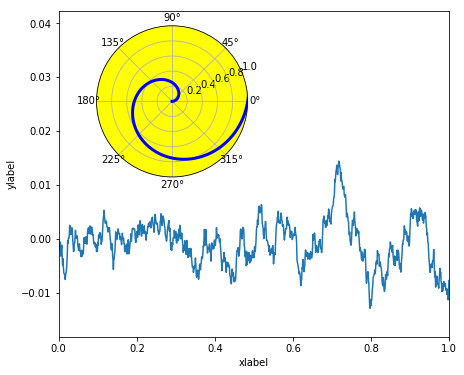

In [229]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import randn, convolve

#data
t = np.arange(0.0, 20.0, 0.001)
r = np.exp(-t[:1000]/0.05)     
x = randn(len(t))
s = convolve(x,r)[:len(x)]*0.001
theta = 2 * np.pi * t
#
fig = plt.figure(figsize=(7, 6))
#main
plt.plot(t, s)
plt.axis([0, 1, np.amin(s), 2.5*np.amax(s)])
plt.xlabel('xlabel')
plt.ylabel('ylabel')
#polar
ax = fig.add_axes([0.2, 0.47, 0.30, 0.40], polar=True, axisbg='yellow')
ax.plot(theta, t, color='blue', lw=3)
ax.set_rmax(1.0)
plt.grid(True)

plt.show()

In [3]:
import numpy as np
from scipy.interpolate import splev, splrep

equinoxAzi = np.array([90, 180, 270]) 
equinoxAlt = np.array([0, 80, 0]) 
summerAzi = np.array([180-121.5, 180, 180+121.5]) 
summerAlt = np.array([0, 60, 0]) 
winterAzi = np.array([180-58.46, 180, 180+58.46]) 
winterAlt = np.array([0, 40, 0])



equinoxX_new = np.linspace(equinoxX.min(),equinoxX.max(),30)
equinoxY_smooth = splev(equinoxX_new, splrep(equinoxX, equinoxY, k=2))

summerX_new = np.linspace(summerX.min(), summerX.max(),30)
summerY_smooth = splev(summerX_new, splrep(summerX, summerY, k=2))

winterX_new = np.linspace(winterX.min(), winterX.max(),30)
winterY_smooth = splev(winterX_new, splrep(winterX, winterY, k=2))

NameError: name 'equinoxX' is not defined

In [12]:
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

winterAzi = np.array([81.67440007, 75.55094006, 67.57616189, 55.73337697])
winterAlt = np.array([11.28088118, 25.0837551, 38.44986883, 50.8769649])

#winterAzi = np.array([func(n,1) for n in range(x,y)])
#winterAlt = np.array([func(n,2) for n in range(x,y)])

#winterAzi = int(winterAzi)
#winterAlt = int(winterAzi)




# create instance of basemap, note we want a south polar projection to 90 = E
myMap = Basemap(projection='spstere',boundinglat=0,lon_0=180,resolution='l',round=True,suppress_ticks=True)
# set the grid up
gridX,gridY = 10.0,15.0
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid, not labels are off. We have to manually create these.
myMap.drawparallels(parallelGrid,labels=[False,False,False,False])
myMap.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

# we have to send our values through basemap to convert coordinates, note -winterAlt
winterX,winterY = myMap(winterAzi,-winterAlt)

# plot azimuth labels, with a North label.
ax = plt.gca()
ax.text(0.5,1.025,'N',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
for para in np.arange(gridY,360,gridY):
    x= (1.1*0.5*np.sin(np.deg2rad(para)))+0.5
    y= (1.1*0.5*np.cos(np.deg2rad(para)))+0.5
    ax.text(x,y,u'%i\N{DEGREE SIGN}'%para,transform=ax.transAxes,horizontalalignment='center',verticalalignment='center')


# plot the winter values
myMap.plot(winterX,winterY ,'bo')

#savefig('foo.png')
plt.show()

TypeError: range() integer end argument expected, got numpy.float64.

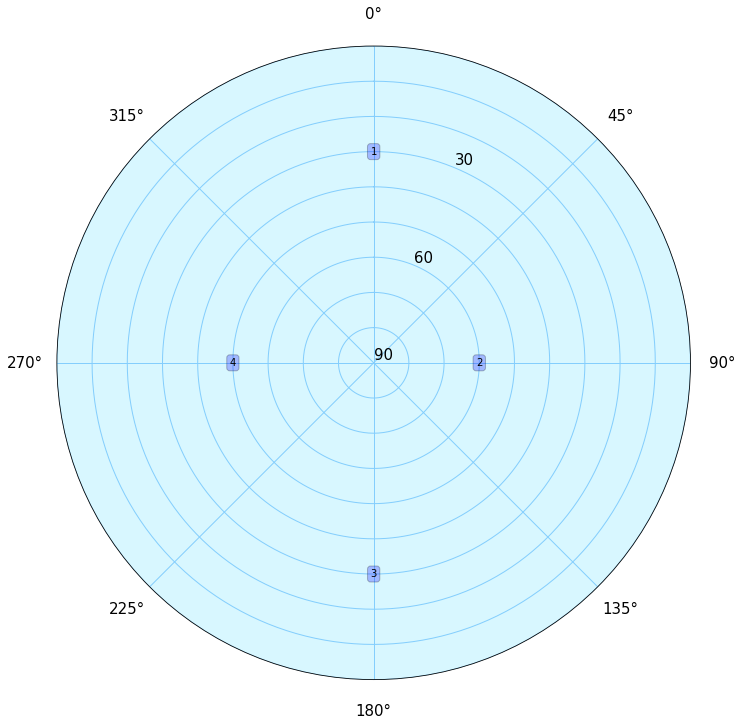

In [21]:
from matplotlib.pyplot import rc, grid, figure, plot, rcParams, savefig
from math import radians
import Here

def generate_satellite_plot(observer_lat, observer_lon):
    rc('grid', color='#84cefd', linewidth=1, linestyle='-')
    rc('xtick', labelsize=15)
    rc('ytick', labelsize=15)
    
    # force square figure and square axes looks better for polar, IMO
    size = 11
    fig = figure(figsize=(size, size))

    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, axisbg='#d8f7ff')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

    sat_positions = [[1, 30, 0], [2, 60, 90], [3, 30, 180], [4, 50, 270]]
    for (PRN, E, Az) in sat_positions:
        ax.annotate(str(PRN),
                    xy=(radians(Az), 90-E),  # theta, radius
                    bbox=dict(boxstyle="round", fc = 'blue', alpha = 0.25),
                    horizontalalignment='center',
                    verticalalignment='center')


    ax.set_yticks(range(0, 90+10, 10))                   # Define the yticks
    yLabel = ['90', '', '', '60', '', '', '30', '', '', '']
    ax.set_yticklabels(yLabel)
    grid(True)
    #plt.figsize=(10,10)
    savefig('foo.png')
    plt.show()
    
observer_lat, observer_lon = Here.here()   
generate_satellite_plot(observer_lat, observer_lon)    
    

In [11]:
!showme foo.png

In [ ]:
https://recalll.co/app/?q=python%20-%20Matplotlib%20inset%20polar%20plot

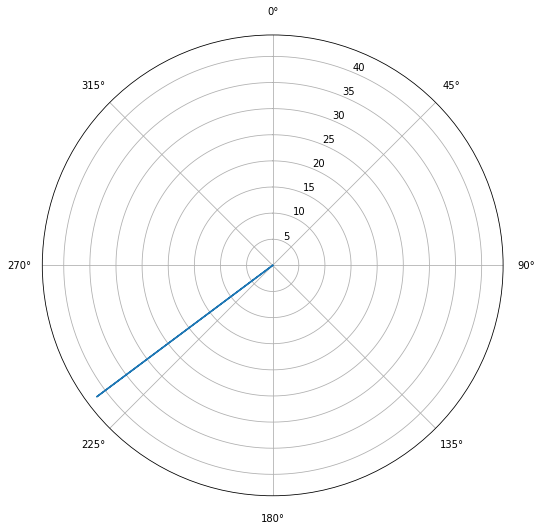

In [228]:
import matplotlib.pylab as plt
testFig = plt.figure(1, figsize=(8,8))
rect = [0.1,0.1,0.8,0.8]
testAx = testFig.add_axes(rect,polar=True)
testAx.invert_yaxis()
testAx.set_theta_zero_location('N')
testAx.set_theta_direction(-1)

Azi = [90,180,270]
Alt= [0,42,0]
testAx.plot(Azi,Alt)
plt.show()

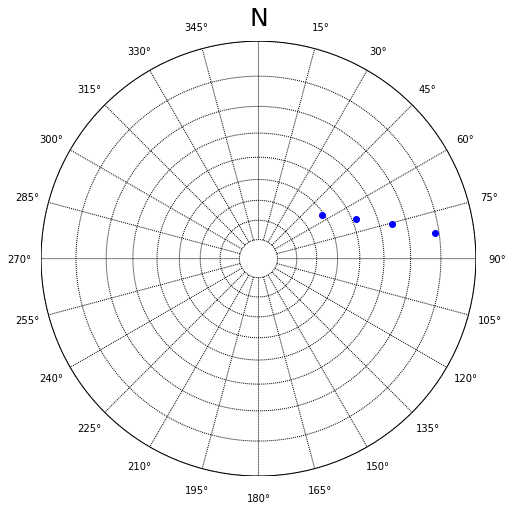

In [22]:

winterAzi = np.array([81.67440007, 75.55094006, 67.57616189, 55.73337697])
winterAlt = np.array([11.28088118, 25.0837551, 38.44986883, 50.8769649])

#create instance of basemap, note we want a south polar projection to 90 = E
myMap = Basemap(projection='spstere',boundinglat=0,lon_0=180,resolution='l',round=True,suppress_ticks=True)
# set the grid up
gridX,gridY = 10.0,15.0
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)
testFig = plt.figure(1, figsize=(8,8))
# draw parallel and meridian grid, not labels are off. We have to manually create these.
myMap.drawparallels(parallelGrid,labels=[False,False,False,False])
myMap.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

# we have to send our values through basemap to convert coordinates, note -winterAlt
winterX,winterY = myMap(winterAzi,-winterAlt)

# plot azimuth labels, with a North label.
ax = plt.gca()
ax.text(0.5,1.025,'N',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
for para in np.arange(gridY,360,gridY):
    x= (1.1*0.5*np.sin(np.deg2rad(para)))+0.5
    y= (1.1*0.5*np.cos(np.deg2rad(para)))+0.5
    ax.text(x,y,u'%i\N{DEGREE SIGN}'%para,transform=ax.transAxes,horizontalalignment='center',verticalalignment='center')


# plot the winter values
myMap.plot(winterX,winterY ,'bo')


plt.show()

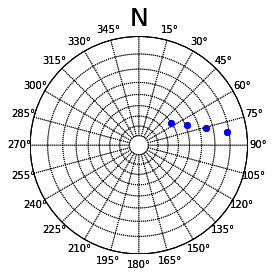

In [7]:
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

winterAzi = np.array([81.67440007, 75.55094006, 67.57616189, 55.73337697])
winterAlt = np.array([11.28088118, 25.0837551, 38.44986883, 50.8769649])

# create instance of basemap, note we want a south polar projection to 90 = E
myMap = Basemap(projection='spstere',boundinglat=0,lon_0=180,resolution='l',round=True,suppress_ticks=True)
# set the grid up
gridX,gridY = 10.0,15.0
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid, not labels are off. We have to manually create these.
myMap.drawparallels(parallelGrid,labels=[False,False,False,False])
myMap.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

# we have to send our values through basemap to convert coordinates, note -winterAlt
winterX,winterY = myMap(winterAzi,-winterAlt)

# plot azimuth labels, with a North label.
ax = plt.gca()
ax.text(0.5,1.025,'N',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
for para in np.arange(gridY,360,gridY):
    x= (1.1*0.5*np.sin(np.deg2rad(para)))+0.5
    y= (1.1*0.5*np.cos(np.deg2rad(para)))+0.5
    ax.text(x,y,u'%i\N{DEGREE SIGN}'%para,transform=ax.transAxes,horizontalalignment='center',verticalalignment='center')


# plot the winter values
myMap.plot(winterX,winterY ,'bo')

plt.show()

In [ ]:
Azimuth Lines - Azimuth angles run around the edge of the diagram.
Altitude Lines - Altitude angles are represented a

In [ ]:
https://sustainabilityworkshop.autodesk.com/buildings/reading-sun-path-diagrams

In [4]:
import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.interpolate import spline

equinoxAzi = np.array([90, 180, 270])
equinoxAlt = np.array([0, 38.7, 0])
summerAzi = np.array([45, 180, 315])
summerAlt = np.array([0, 62.1, 0])
winterAzi = np.array([135, 180, 225])
winterAlt = np.array([0, 16, 0])


# create instance of basemap, note we want a south polar projection to 90 = E
myMap = Basemap(projection='spstere',boundinglat=0,lon_0=180,resolution='l',round=True,suppress_ticks=True)
# set the grid up
gridX,gridY = 10.0,15.0
parallelGrid = np.arange(-90.0,90.0,gridX)
meridianGrid = np.arange(-180.0,180.0,gridY)

# draw parallel and meridian grid, not labels are off. We have to manually create these.
myMap.drawparallels(parallelGrid,labels=[False,False,False,False])
myMap.drawmeridians(meridianGrid,labels=[False,False,False,False],labelstyle='+/-',fmt='%i')

# we have to send our values through basemap to convert coordinates, note -winterAlt
equinoxX, equinoxY = myMap(equinoxAzi, -equinoxAlt)
summerX, summerY = myMap(summerAzi, -summerAlt)
winterX, winterY = myMap(winterAzi, -winterAlt)


# plot azimuth labels, with a North label.
ax = plt.gca()
ax.text(0.5,1.025,'N',transform=ax.transAxes,horizontalalignment='center',verticalalignment='bottom',size=25)
for para in np.arange(gridY,360,gridY):
    x= (1.1*0.5*np.sin(np.deg2rad(para)))+0.5
    y= (1.1*0.5*np.cos(np.deg2rad(para)))+0.5
    ax.text(x,y,u'%i\N{DEGREE SIGN}'%para,transform=ax.transAxes,horizontalalignment='center',verticalalignment='center')

equinoxX_new = np.linspace(equinoxX.min(),equinoxY.max(),30)
equinoxY_smooth = spline(equinoxX, equinoxY, equinoxX_new)

summerX_new = np.linspace(summerX.min(), summerX.max(),30)
summerY_smooth = spline(summerX, summerY, summerX_new)

winterX_new = np.linspace(winterX.min(), winterX.max(),30)
winterY_smooth = spline(winterX, winterY, winterX_new)

myMap.plot(equinoxX_new, equinoxY_smooth, 'b')
myMap.plot(summerX_new, summerY_smooth, 'g')
myMap.plot(winterX_new, winterY_smooth/2, 'r')

myMap.plot(equinoxX, equinoxY, 'bo')
myMap.plot(summerX, summerY, 'go')
myMap.plot(winterX, winterY, 'ro')

plt.show()

/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:40: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


LinAlgError: Matrix is singular.

In [ ]:
# Working VIA Command line

In [38]:
import Here
x,y = Here.here()
print x, y

14.797424 121.057481


In [45]:
%%writefile analemma.py
#! /usr/bin/env python

# Display an analemma for a specified location and time.
# Copyright 2011 by Akkana Peck: share and enjoy under the GPL v2 or later.
import ephem
import sys
sys.path.insert(0, "/usr/lib/python2.7/dist-packages/gtk-2.0/")
import gtk
sys.path.insert(0, "/usr/lib/python2.7/dist-packages")
import gobject
import os
import math
import Here
class AnalemmaWindow:
    def __init__(self, observer, year):
        self.observer = observer
        self.year = year

        self.special_dates = None
        self.drawing_area = None
        self.xgc = None
        self.bgc = None
        self.specialgc = None
        self.width = 0
        self.height = 0
        self.sun = ephem.Sun()
        self.sinusoidal = False

    def draw_sun_position(self, date):
        if not self.drawing_area:
            print "no drawing area"
            return
        if not self.xgc:
            print "no GC"
            return
        self.observer.date = self.local_to_gmt(date, reverse=True)

        self.sun.compute(self.observer)

        # Y scale is 90 degrees (PI/2), horizon to zenith:
        # y = self.height - int(float(self.sun.alt) * self.height / math.pi * 2)

        # So make X scale 90 degrees too, centered around due south.
        # Want az = PI to come out at x = width/2,
        # az = PI/2 to be 0, 3*PI/2 = width.
        # x = int(float(self.sun.az) * self.width / math.pi * 2 - self.width / 2) % self.width

        self.project_and_draw(self.sun.az, self.sun.alt, 4)

    def calc_special_dates(self):
        '''Earlist and latest rising and setting times,
           and longest/shortest day.
        '''
        if self.special_dates:
            # Already done, nothing more to do.
            return

        self.special_dates = {
            'earliest sunrise': 24,
            'latest sunrise'  :  0,
            'earliest sunset' : 24,
            'latest sunset'   :  0,
            'longest day len' :  0,
            'shortest day len': 24
        }

        # Start just after midnight on New Year's Day.
        dt = self.local_to_gmt('%d/01/01 00:00:01' % (self.year))
        while (dt.tuple()[0] == self.year):
            self.observer.date = dt
            risetime = self.observer.next_rising(ephem.Sun())
            self.observer.date = risetime
            settime = self.observer.next_setting(ephem.Sun())
            self.observer.date = settime

            # Now we're done setting observer time, so it's safe to
            # convert to localtime.
            risetime = self.local_mean_time(risetime)
            settime = self.local_mean_time(settime)
            risehours = self.ephemdate_to_hours(risetime)
            sethours = self.ephemdate_to_hours(settime)

            if risehours < self.ephemdate_to_hours(self.special_dates['earliest sunrise']):
                self.special_dates['earliest sunrise'] = risetime
            if risehours > self.ephemdate_to_hours(self.special_dates['latest sunrise']):
                self.special_dates['latest sunrise'] = risetime
            if sethours < self.ephemdate_to_hours(self.special_dates['earliest sunset']):
                self.special_dates['earliest sunset'] = settime
            if sethours > self.ephemdate_to_hours(self.special_dates['latest sunset']):
                self.special_dates['latest sunset'] = settime

            # calculate daylength in hours
            daylength = (settime - risetime) * 24.
            if daylength < self.special_dates['shortest day len']:
                self.special_dates['shortest day'] = risetime
                self.special_dates['shortest day len'] = daylength
            if daylength > self.special_dates['longest day len']:
                self.special_dates['longest day'] = risetime
                self.special_dates['longest day len'] = daylength

            dt = ephem.date(dt + ephem.hour * 24)

    def gmt_for_time_on_date(self, edate, timetuple):
        '''Returns the ephem.date for the GMT corresponding to localtime
           timetuple on the given ephem.date.
        '''
        tup = list(edate.tuple())
        tup[3], tup[4], tup[5] = timetuple
        return self.local_to_gmt(ephem.date(tuple(tup)), reverse=True)

    def draw_special_dates(self, timestr):
        # Make a tuple out from timestr
        if ':' in timestr:
            timetuple = map(int, timestr.split(':'))
            while len(timetuple) < 3:
                timetuple.append(0)
        else:
            timetuple = (int(timestr), 0, 0)

        for key in self.special_dates:
            d = self.special_dates[key]
            if not isinstance(d, ephem.date):
                continue

            gmt = self.gmt_for_time_on_date(d, timetuple)
            self.observer.date = self.gmt_for_time_on_date(d, timetuple)
            self.sun.compute(self.observer)
            x, y = self.project(self.sun.az, self.sun.alt)
            self.draw_dot(self.specialgc, x, y, 7)

            # Offsets to figure out where to draw the string.
            # That's tough, because they're normally on top of each other.
            # Latest sunrise is a little left of earliest sunset,
            # and shortest day is in between and a little below both.
            offsets = { "latest sunrise"   : (-1,  0),
                        "earliest sunset"  : ( 1,  0),
                        "shortest day"     : ( 0,  1),
                        "latest sunset"    : (-1,  0),
                        "earliest sunrise" : ( 1,  0),
                        "longest day"      : ( 0, -1)
            }
            factor = 30
            xoffset = int(offsets[key][0] * factor)
            yoffset = int(offsets[key][1] * factor)
            self.drawing_area.window.draw_line(self.specialgc, x, y,
                                               x + xoffset, y + yoffset)
            s = str(self.special_dates[key])
            if key + " len" in self.special_dates:
                # for longest/shortest days, split off the time part
                s = s.split(' ')[0]
                # and then add the day length
                s += ", %.1f hrs" % self.special_dates[key + " len"]
            self.draw_string(key + "\n" + s,
                             x + xoffset, y + yoffset, self.specialgc,
                             offsets=offsets[key])

        # Draw the equinoxes too. Solstices are too crowded what with
        # all the other special dates.

        def draw_equinox(start, whicheq, offsets):
            equinox = ephem.next_equinox(start)
            self.observer.date = self.gmt_for_time_on_date(equinox, (12, 0, 0))
            self.sun.compute(self.observer)
            x, y = self.project(self.sun.az, self.sun.alt)
            self.draw_dot(self.specialgc, x, y, 7)
            x1 = x + offsets[0] * 20
            self.drawing_area.window.draw_line(self.specialgc, x, y, x1, y)
            eqstr = "%s equinox\n%s" % (whicheq, str(equinox).split(' ')[0])
            self.draw_string(eqstr, x1, y, self.specialgc, offsets)

        draw_equinox("%d/1/1" % self.year, "Vernal", (-1, 0))
        draw_equinox(observer.date, "Autumnal", (1, 0))

    def special_dates_str(self):
        if not self.special_dates:
            self.calc_special_dates()
        s = '''
Longest day: %d hours on %s
Shortest day: %d hours on %s
Earliest sunrise: %s
Latest sunrise: %s
Earliest sunset: %s
Latest sunset: %s
''' %      (self.special_dates["longest day len"],
            str(self.special_dates["longest day"]),
            self.special_dates["shortest day len"],
            str(self.special_dates["shortest day"]),
            str(self.special_dates["earliest sunrise"]),
            str(self.special_dates["latest sunrise"]),
            str(self.special_dates["earliest sunset"]),
            str(self.special_dates["latest sunset"]))
        return s

    def local_mean_time(self, d, reverse=False):
        '''Adjust GMT to local time.
           We don't know time zone, but we can adjust for actual
           local noon since we know the Observer's longitude:
        '''
        return ephem.date(ephem.date(d) \
                    + float(self.observer.lon) * 12 / math.pi * ephem.hour)

    def local_to_gmt(self, d, reverse=False):
        '''Adjust GMT to local time.
           We don't know time zone, but we can adjust for actual
           local noon since we know the Observer's longitude:
        '''
        return ephem.date(ephem.date(d) \
                    - float(self.observer.lon) * 12 / math.pi * ephem.hour)

    def ephemdate_to_hours(self, edate):
        if isinstance(edate, int):
            return edate
        etuple = edate.tuple()
        return etuple[3] + etuple[4]/60. + etuple[5]/3600.

    def draw_dot(self, gc, x, y, dotsize):
        # Draw the dot centered, not hanging off to the lower right:
        x = int(x - dotsize / 2)
        y = int(y - dotsize / 2)

        if dotsize == 1:
            self.drawing_area.window.draw_points(gc, [(x, y)])
        elif dotsize <= 4:
            self.drawing_area.window.draw_rectangle(gc, True, x, y,
                                                    dotsize, dotsize)
        else:
            self.drawing_area.window.draw_arc(gc, True, x, y,
                                              dotsize, dotsize, 0, 23040)

    def draw_string(self, label, x, y, gc=None, offsets=None):
        '''Draw a string at the specified point.
           offsets is an optional tuple specifying where the string will
           be drawn relative to the coordinates passed in;
           for instance, if offsets are (-1, -1) the string will be
           drawn with the bottom right edge at the given x, y.
        '''
        layout = self.drawing_area.create_pango_layout(label)
        # layout.set_font_description(self.font_desc)
        if not gc:
            gc = self.xgc
        if offsets:
            # pango draws text with the upper left corner at x, y.
            # So that's an offset of (1, 1). Adjust if offsets are different.
            width, height = layout.get_pixel_size()
            if offsets[0] == 0:
                x -= int(width/2)
            elif offsets[0] != 1:
                x += int(width * offsets[0])
            if offsets[1] != 1:
                y += int(height * offsets[1] - height/2)
        self.drawing_area.window.draw_layout(gc, x, y, layout)

    def project_rectangular(self, az, alt):
        """Rectangular -- don't do any projection, just scaling"""

        y = int((math.pi/2 - alt) * (self.height * 2 / math.pi))
        x = int(az * self.width / math.pi - self.width/2)

        return (x, y)

    def project_sinusoidal(self, lon, lat):
        """Return a sinusoidal projection as (x, y)"""
        # XXX Actually this is bogus, it's not being used right for alt/az.

        # Sinusoidal projection
        y = int((math.pi/2 - lat) * self.height * 2 / math.pi)

        if lat > 90:
            print "lat is", lat
            return (0, 0)

        if lon < math.pi/2:
            gc = self.bgc
            lon = math.pi - lon
        elif lon > 3*math.pi/2:
            gc = self.bgc
            lon = 3 * math.pi - lon
        else:
            gc = self.xgc

        x = int(((lon - math.pi) * math.cos(lat) * self.width / math.pi)
                 + self.width/2)

        if dotsize > 0:
            self.draw_dot(gc, x, y, dotsize)

        #print int(lon*180/math.pi), int(lat*180/math.pi), x, y

        return (x, y)

    def project_and_draw(self, az, alt, dotsize):
        if az < math.pi/2:
            gc = self.bgc
            az = math.pi - az
        elif az > 3*math.pi/2:
            gc = self.bgc
            az = 3 * math.pi - az
        else:
            gc = self.xgc

        x, y = self.project(az, alt)

        if dotsize > 0:
            self.draw_dot(gc, x, y, dotsize)

    def project(self, az, alt):
        if self.sinusoidal:
            return self.project_sinusoidal(az, alt)
        else:
            return self.project_rectangular(az, alt)

    def expose_handler(self, widget, event):
        # print "Expose"
        if not self.xgc:
            self.xgc = widget.window.new_gc()
            self.bgc = widget.window.new_gc()
            self.specialgc = widget.window.new_gc()
        self.width, self.height = self.drawing_area.window.get_size()

        # Draw a blue background. But if we're using a sinusoidal
        # projection, then only color the projected part blue.
        self.xgc.set_rgb_fg_color(gtk.gdk.Color(0, 0, 65535))
        if self.sinusoidal:
        # the "backside" GC will have a different color
            self.bgc.set_rgb_fg_color(gtk.gdk.Color(0, 0, 0))
            self.drawing_area.window.draw_rectangle(self.bgc, True, 0, 0,
                                                    self.width, self.height)
            for f in range(0, int(math.pi * 100)):
                theta = f/200.
                (x, y) = self.project_sinusoidal(math.pi/2, theta, 0)
                #print f, theta, x, y
                self.drawing_area.window.draw_rectangle(self.xgc, True,
                                                        x, y,
                                                        self.width - 2*x, 4)
        else:
            self.drawing_area.window.draw_rectangle(self.xgc, True, 0, 0,
                                                    self.width, self.height)

        # "Special" gc to be used for showing special dates
        self.specialgc.set_rgb_fg_color(gtk.gdk.Color(65535, 65535, 65535))

        # Draw some projected grid lines
        #self.xgc.set_rgb_fg_color(gtk.gdk.Color(16384, 16384, 16384))
        self.xgc.set_rgb_fg_color(gtk.gdk.Color(65535, 65535, 65535))
        for f in range(0, int(math.pi * 100), 5):
            theta = f/200.   # i is going from 0 to pi/2
            # Draw the equator: (doesn't actually show up)
            # self.project_and_draw(theta + math.pi/2, 0., 1)
            # self.project_and_draw(theta + math.pi, 0., 1)

            # Central meridian (180 dgrees)
            self.project_and_draw(math.pi, theta, 1)

            # and a few other lines
            # self.project_and_draw(math.pi * .75, theta, 1)
            # self.project_and_draw(math.pi*1.25, theta, 1)

        # Then prepare to draw the sun in yellow:
        self.xgc.set_rgb_fg_color(gtk.gdk.Color(65535, 65535, 0))

        # the "backside" GC will have a different color
        self.bgc.set_rgb_fg_color(gtk.gdk.Color(65535, 32767, 0))

        # Calculate earliest sunrise and suchlike.
        self.calc_special_dates()

        # Draw three analemmas, showing the sun positions at 7:40 am,
        # noon, and 4:40 pm ... in each case adjusted for mean solar time,
        # i.e. the observer's position within their timezone.
        for time in [ '8:00', '12:00', '16:00' ]:
            for m in range(1, 13):
                self.draw_sun_position('%d/%d/1 %s' % (self.year, m, time))
                self.draw_sun_position('%d/%d/10 %s' % (self.year, m, time))
                self.draw_sun_position('%d/%d/20 %s' % (self.year, m, time))

        # Mark special dates for mean solar noon.
        self.draw_special_dates("12:00")

        # Make a label
        if observer.name == "custom":
            obslabel = "Observer at %.1f N, %.1f E" % (observer.lat,
                                                       observer.lon)
        else:
            obslabel = "Observer in " + self.observer.name
        self.draw_string(obslabel, 10, 10)

    def show_window(self):
        win = gtk.Window()
        self.drawing_area = gtk.DrawingArea()
        self.drawing_area.connect("expose-event", self.expose_handler)
        win.add(self.drawing_area)
        self.drawing_area.show()
        win.connect("destroy", gtk.main_quit)
        win.set_default_size(1025, 512)
        win.show()
        gtk.main()

if __name__ == "__main__":
    def Usage():
        progname = os.path.basename(sys.argv[0])
        print """Usage: %s [cityname]
       %s [lat lon]""" % (progname, progname)
        sys.exit(0)
    if len(sys.argv) == 2:
        if sys.argv[1] == "-h" or sys.argv[1] == "--help":
            Usage()
        observer = ephem.city(sys.argv[1])
    elif len(sys.argv) == 3:
        observer = ephem.Observer()
        #observer.name = "Gaya Gaya, Philippines"
        #observer.lon = sys.argv[1]
        #observer.lat = sys.argv[2]
        #x, y = Here.here()
        #observer.lon = y
        #observer.lat = x 
        observer.name = "San Jose"
        observer.lon = '-121:56.8'
        observer.lat = '37:15.55'        
    else:
        # default to San Jose
        # pyephem doesn't know ephem.city('San Jose')
        # Houge Park is -121^56.53' 37^15.38'
        observer = ephem.Observer()
        observer.name = "San Jose"
        #observer.lon = '-121:56.8'
        #observer.lat = '37:15.55'
        #observer.name = "Gaya Gaya, Philippines"
        #observer.lon = sys.argv[1]
        #observer.lat = sys.argv[2]
        #x, y = Here.here()
        observer.lon = "121.057481"
        observer.lat = "14.797424"         
        
        observer.elevation = 100

    awin = AnalemmaWindow(observer, ephem.now().triple()[0])
    print awin.special_dates_str(),x,y
    awin.show_window()

Overwriting analemma.py


In [56]:
%%writefile analemma.py
#! /usr/bin/env python

# Display an analemma for a specified location and time.
# Copyright 2011 by Akkana Peck: share and enjoy under the GPL v2 or later.
import ephem
import sys
sys.path.insert(0, "/usr/lib/python2.7/dist-packages/gtk-2.0/")
import gtk
sys.path.insert(0, "/usr/lib/python2.7/dist-packages")
import gobject
import os
import math
import Here
class AnalemmaWindow:
    def __init__(self, observer, year):
        self.observer = observer
        self.year = year

        self.special_dates = None
        self.drawing_area = None
        self.xgc = None
        self.bgc = None
        self.specialgc = None
        self.width = 0
        self.height = 0
        self.sun = ephem.Sun()
        self.sinusoidal = False

    def draw_sun_position(self, date):
        if not self.drawing_area:
            print "no drawing area"
            return
        if not self.xgc:
            print "no GC"
            return
        self.observer.date = self.local_to_gmt(date, reverse=True)

        self.sun.compute(self.observer)

        # Y scale is 90 degrees (PI/2), horizon to zenith:
        # y = self.height - int(float(self.sun.alt) * self.height / math.pi * 2)

        # So make X scale 90 degrees too, centered around due south.
        # Want az = PI to come out at x = width/2,
        # az = PI/2 to be 0, 3*PI/2 = width.
        # x = int(float(self.sun.az) * self.width / math.pi * 2 - self.width / 2) % self.width

        self.project_and_draw(self.sun.az, self.sun.alt, 4)

    def calc_special_dates(self):
        '''Earlist and latest rising and setting times,
           and longest/shortest day.
        '''
        if self.special_dates:
            # Already done, nothing more to do.
            return

        self.special_dates = {
            'earliest sunrise': 24,
            'latest sunrise'  :  0,
            'earliest sunset' : 24,
            'latest sunset'   :  0,
            'longest day len' :  0,
            'shortest day len': 24
        }

        # Start just after midnight on New Year's Day.
        dt = self.local_to_gmt('%d/01/01 00:00:01' % (self.year))
        while (dt.tuple()[0] == self.year):
            self.observer.date = dt
            risetime = self.observer.next_rising(ephem.Sun())
            self.observer.date = risetime
            settime = self.observer.next_setting(ephem.Sun())
            self.observer.date = settime

            # Now we're done setting observer time, so it's safe to
            # convert to localtime.
            risetime = self.local_mean_time(risetime)
            settime = self.local_mean_time(settime)
            risehours = self.ephemdate_to_hours(risetime)
            sethours = self.ephemdate_to_hours(settime)

            if risehours < self.ephemdate_to_hours(self.special_dates['earliest sunrise']):
                self.special_dates['earliest sunrise'] = risetime
            if risehours > self.ephemdate_to_hours(self.special_dates['latest sunrise']):
                self.special_dates['latest sunrise'] = risetime
            if sethours < self.ephemdate_to_hours(self.special_dates['earliest sunset']):
                self.special_dates['earliest sunset'] = settime
            if sethours > self.ephemdate_to_hours(self.special_dates['latest sunset']):
                self.special_dates['latest sunset'] = settime

            # calculate daylength in hours
            daylength = (settime - risetime) * 24.
            if daylength < self.special_dates['shortest day len']:
                self.special_dates['shortest day'] = risetime
                self.special_dates['shortest day len'] = daylength
            if daylength > self.special_dates['longest day len']:
                self.special_dates['longest day'] = risetime
                self.special_dates['longest day len'] = daylength

            dt = ephem.date(dt + ephem.hour * 24)

    def gmt_for_time_on_date(self, edate, timetuple):
        '''Returns the ephem.date for the GMT corresponding to localtime
           timetuple on the given ephem.date.
        '''
        tup = list(edate.tuple())
        tup[3], tup[4], tup[5] = timetuple
        return self.local_to_gmt(ephem.date(tuple(tup)), reverse=True)

    def draw_special_dates(self, timestr):
        # Make a tuple out from timestr
        if ':' in timestr:
            timetuple = map(int, timestr.split(':'))
            while len(timetuple) < 3:
                timetuple.append(0)
        else:
            timetuple = (int(timestr), 0, 0)

        for key in self.special_dates:
            d = self.special_dates[key]
            if not isinstance(d, ephem.date):
                continue

            gmt = self.gmt_for_time_on_date(d, timetuple)
            self.observer.date = self.gmt_for_time_on_date(d, timetuple)
            self.sun.compute(self.observer)
            x, y = self.project(self.sun.az, self.sun.alt)
            self.draw_dot(self.specialgc, x, y, 7)

            # Offsets to figure out where to draw the string.
            # That's tough, because they're normally on top of each other.
            # Latest sunrise is a little left of earliest sunset,
            # and shortest day is in between and a little below both.
            offsets = { "latest sunrise"   : (-1,  0),
                        "earliest sunset"  : ( 1,  0),
                        "shortest day"     : ( 0,  1),
                        "latest sunset"    : (-1,  0),
                        "earliest sunrise" : ( 1,  0),
                        "longest day"      : ( 0, -1)
            }
            factor = 30
            xoffset = int(offsets[key][0] * factor)
            yoffset = int(offsets[key][1] * factor)
            self.drawing_area.window.draw_line(self.specialgc, x, y,
                                               x + xoffset, y + yoffset)
            s = str(self.special_dates[key])
            if key + " len" in self.special_dates:
                # for longest/shortest days, split off the time part
                s = s.split(' ')[0]
                # and then add the day length
                s += ", %.1f hrs" % self.special_dates[key + " len"]
            self.draw_string(key + "\n" + s,
                             x + xoffset, y + yoffset, self.specialgc,
                             offsets=offsets[key])

        # Draw the equinoxes too. Solstices are too crowded what with
        # all the other special dates.

        def draw_equinox(start, whicheq, offsets):
            equinox = ephem.next_equinox(start)
            self.observer.date = self.gmt_for_time_on_date(equinox, (12, 0, 0))
            self.sun.compute(self.observer)
            x, y = self.project(self.sun.az, self.sun.alt)
            self.draw_dot(self.specialgc, x, y, 7)
            x1 = x + offsets[0] * 20
            self.drawing_area.window.draw_line(self.specialgc, x, y, x1, y)
            eqstr = "%s equinox\n%s" % (whicheq, str(equinox).split(' ')[0])
            self.draw_string(eqstr, x1, y, self.specialgc, offsets)

        draw_equinox("%d/1/1" % self.year, "Vernal", (-1, 0))
        draw_equinox(observer.date, "Autumnal", (1, 0))

    def special_dates_str(self):
        if not self.special_dates:
            self.calc_special_dates()
        s = '''
Longest day: %d hours on %s
Shortest day: %d hours on %s
Earliest sunrise: %s
Latest sunrise: %s
Earliest sunset: %s
Latest sunset: %s
''' %      (self.special_dates["longest day len"],
            str(self.special_dates["longest day"]),
            self.special_dates["shortest day len"],
            str(self.special_dates["shortest day"]),
            str(self.special_dates["earliest sunrise"]),
            str(self.special_dates["latest sunrise"]),
            str(self.special_dates["earliest sunset"]),
            str(self.special_dates["latest sunset"]))
        return s

    def local_mean_time(self, d, reverse=False):
        '''Adjust GMT to local time.
           We don't know time zone, but we can adjust for actual
           local noon since we know the Observer's longitude:
        '''
        return ephem.date(ephem.date(d) \
                    + float(self.observer.lon) * 12 / math.pi * ephem.hour)

    def local_to_gmt(self, d, reverse=False):
        '''Adjust GMT to local time.
           We don't know time zone, but we can adjust for actual
           local noon since we know the Observer's longitude:
        '''
        return ephem.date(ephem.date(d) \
                    - float(self.observer.lon) * 12 / math.pi * ephem.hour)

    def ephemdate_to_hours(self, edate):
        if isinstance(edate, int):
            return edate
        etuple = edate.tuple()
        return etuple[3] + etuple[4]/60. + etuple[5]/3600.

    def draw_dot(self, gc, x, y, dotsize):
        # Draw the dot centered, not hanging off to the lower right:
        x = int(x - dotsize / 2)
        y = int(y - dotsize / 2)

        if dotsize == 1:
            self.drawing_area.window.draw_points(gc, [(x, y)])
        elif dotsize <= 4:
            self.drawing_area.window.draw_rectangle(gc, True, x, y,
                                                    dotsize, dotsize)
        else:
            self.drawing_area.window.draw_arc(gc, True, x, y,
                                              dotsize, dotsize, 0, 23040)

    def draw_string(self, label, x, y, gc=None, offsets=None):
        '''Draw a string at the specified point.
           offsets is an optional tuple specifying where the string will
           be drawn relative to the coordinates passed in;
           for instance, if offsets are (-1, -1) the string will be
           drawn with the bottom right edge at the given x, y.
        '''
        layout = self.drawing_area.create_pango_layout(label)
        # layout.set_font_description(self.font_desc)
        if not gc:
            gc = self.xgc
        if offsets:
            # pango draws text with the upper left corner at x, y.
            # So that's an offset of (1, 1). Adjust if offsets are different.
            width, height = layout.get_pixel_size()
            if offsets[0] == 0:
                x -= int(width/2)
            elif offsets[0] != 1:
                x += int(width * offsets[0])
            if offsets[1] != 1:
                y += int(height * offsets[1] - height/2)
        self.drawing_area.window.draw_layout(gc, x, y, layout)

    def project_rectangular(self, az, alt):
        """Rectangular -- don't do any projection, just scaling"""

        y = int((math.pi/2 - alt) * (self.height * 2 / math.pi))
        x = int(az * self.width / math.pi - self.width/2)

        return (x, y)

    def project_sinusoidal(self, lon, lat):
        """Return a sinusoidal projection as (x, y)"""
        # XXX Actually this is bogus, it's not being used right for alt/az.

        # Sinusoidal projection
        y = int((math.pi/2 - lat) * self.height * 2 / math.pi)

        if lat > 90:
            print "lat is", lat
            return (0, 0)

        if lon < math.pi/2:
            gc = self.bgc
            lon = math.pi - lon
        elif lon > 3*math.pi/2:
            gc = self.bgc
            lon = 3 * math.pi - lon
        else:
            gc = self.xgc

        x = int(((lon - math.pi) * math.cos(lat) * self.width / math.pi)
                 + self.width/2)

        if dotsize > 0:
            self.draw_dot(gc, x, y, dotsize)

        #print int(lon*180/math.pi), int(lat*180/math.pi), x, y

        return (x, y)

    def project_and_draw(self, az, alt, dotsize):
        if az < math.pi/2:
            gc = self.bgc
            az = math.pi - az
        elif az > 3*math.pi/2:
            gc = self.bgc
            az = 3 * math.pi - az
        else:
            gc = self.xgc

        x, y = self.project(az, alt)

        if dotsize > 0:
            self.draw_dot(gc, x, y, dotsize)

    def project(self, az, alt):
        if self.sinusoidal:
            return self.project_sinusoidal(az, alt)
        else:
            return self.project_rectangular(az, alt)

    def expose_handler(self, widget, event):
        # print "Expose"
        if not self.xgc:
            self.xgc = widget.window.new_gc()
            self.bgc = widget.window.new_gc()
            self.specialgc = widget.window.new_gc()
        self.width, self.height = self.drawing_area.window.get_size()

        # Draw a blue background. But if we're using a sinusoidal
        # projection, then only color the projected part blue.
        self.xgc.set_rgb_fg_color(gtk.gdk.Color(0, 0, 65535))
        if self.sinusoidal:
        # the "backside" GC will have a different color
            self.bgc.set_rgb_fg_color(gtk.gdk.Color(0, 0, 0))
            self.drawing_area.window.draw_rectangle(self.bgc, True, 0, 0,
                                                    self.width, self.height)
            for f in range(0, int(math.pi * 100)):
                theta = f/200.
                (x, y) = self.project_sinusoidal(math.pi/2, theta, 0)
                #print f, theta, x, y
                self.drawing_area.window.draw_rectangle(self.xgc, True,
                                                        x, y,
                                                        self.width - 2*x, 4)
        else:
            self.drawing_area.window.draw_rectangle(self.xgc, True, 0, 0,
                                                    self.width, self.height)

        # "Special" gc to be used for showing special dates
        self.specialgc.set_rgb_fg_color(gtk.gdk.Color(65535, 65535, 65535))

        # Draw some projected grid lines
        #self.xgc.set_rgb_fg_color(gtk.gdk.Color(16384, 16384, 16384))
        self.xgc.set_rgb_fg_color(gtk.gdk.Color(65535, 65535, 65535))
        for f in range(0, int(math.pi * 100), 5):
            theta = f/200.   # i is going from 0 to pi/2
            # Draw the equator: (doesn't actually show up)
            # self.project_and_draw(theta + math.pi/2, 0., 1)
            # self.project_and_draw(theta + math.pi, 0., 1)

            # Central meridian (180 dgrees)
            self.project_and_draw(math.pi, theta, 1)

            # and a few other lines
            # self.project_and_draw(math.pi * .75, theta, 1)
            # self.project_and_draw(math.pi*1.25, theta, 1)

        # Then prepare to draw the sun in yellow:
        self.xgc.set_rgb_fg_color(gtk.gdk.Color(65535, 65535, 0))

        # the "backside" GC will have a different color
        self.bgc.set_rgb_fg_color(gtk.gdk.Color(65535, 32767, 0))

        # Calculate earliest sunrise and suchlike.
        self.calc_special_dates()

        # Draw three analemmas, showing the sun positions at 7:40 am,
        # noon, and 4:40 pm ... in each case adjusted for mean solar time,
        # i.e. the observer's position within their timezone.
        for time in [ '8:00', '12:00', '16:00' ]:
            for m in range(1, 13):
                self.draw_sun_position('%d/%d/1 %s' % (self.year, m, time))
                self.draw_sun_position('%d/%d/10 %s' % (self.year, m, time))
                self.draw_sun_position('%d/%d/20 %s' % (self.year, m, time))

        # Mark special dates for mean solar noon.
        self.draw_special_dates("12:00")

        # Make a label
        if observer.name == "custom":
            obslabel = "Observer at %.1f N, %.1f E" % (observer.lat,
                                                       observer.lon)
        else:
            obslabel = "Observer in " + self.observer.name
        self.draw_string(obslabel, 10, 10)

    def show_window(self):
        win = gtk.Window()
        self.drawing_area = gtk.DrawingArea()
        self.drawing_area.connect("expose-event", self.expose_handler)
        win.add(self.drawing_area)
        self.drawing_area.show()
        win.connect("destroy", gtk.main_quit)
        win.set_default_size(1025, 512)
        win.show()
        gtk.main()

if __name__ == "__main__":
    def Usage():
        progname = os.path.basename(sys.argv[0])
        print """Usage: %s [cityname]
       %s [lat lon]""" % (progname, progname)
        sys.exit(0)
    if len(sys.argv) == 2:
        if sys.argv[1] == "-h" or sys.argv[1] == "--help":
            Usage()
        observer = ephem.city(sys.argv[1])
    elif len(sys.argv) == 3:
        observer = ephem.Observer()
        observer.name = "Custom"
        observer.lon = sys.argv[1]
        observer.lat = sys.argv[2]
        
        #y=Here.here()[1]
        #observer.lon = y
        #observer.lat = x 
        #observer.name = "San Jose"
        #observer.lon = '-121:56.8'
        #observer.lat = '37:15.55'        
    else:
        # default to San Jose
        # pyephem doesn't know ephem.city('San Jose')
        # Houge Park is -121^56.53' 37^15.38'
        observer = ephem.Observer()
        observer.name = "Manila"
        #x, y =Here.here()
        #x = str(x);y=str(y)
        #observer.lon = "121:05.7"
        #observer.lat = "14:59.7"
        observer.lon = '-241:56.8'
        observer.lat = '37:15.55'                
        observer.elevation = 100

    awin = AnalemmaWindow(observer, ephem.now().triple()[0])
    x, y =Here.here()
    print awin.special_dates_str(),x,y
    awin.show_window()

Overwriting analemma.py


In [ ]:
14° 47' 50.7264'' N
121° 3' 26.932'' E

In [41]:

x, y = Here.here()
print x,y

14.797424 121.057481


In [30]:
!rm /usr/lib/python2.7/dist-packages/gtk-2.0/gtk/__init__.pyc

rm: cannot remove '/usr/lib/python2.7/dist-packages/gtk-2.0/gtk/__init__.pyc': No such file or directory


In [ ]:
https://pythonhosted.org/astral/module.html

In [ ]:
>>> from astral import GoogleGeocoder
>>> a = Astral(GoogleGeocoder)

or

>>> from astral import GoogleGeocoder
>>> a = Astral()
>>> a.geocoder = GoogleGeocoder()



In [5]:
from astral import GoogleGeocoder
a = Astral(GoogleGeocoder)

In [7]:
import SearchFilename
filename = "astralGOOD.txt"
length = 4
SearchFilename.searchfilename(filename, length)

Search Phrase : solar_azimuth
solar_azimuth(dateandtime, latitude, longitude)
Calculate the azimuth angle of the sun
Parameters
• dateandtime (datetime) – The date and time for which to calculate the angle
• latitude (float) – Latitude - Northern latitudes should be positive
• longitude (float) – Longitude - Eastern longitudes should be positive
Returns The azimuth angle in degrees clockwise from North
Return type float
If dateandtime is a naive Python datetime then it is assumed to be in the UTC timezone
solar_elevation(dateandtime, latitude, longitude)
Calculate the elevation angle of the sun
Parameters
• dateandtime (datetime) – The date and time for which to calculate the angle
• latitude (float) – Latitude - Northern latitudes should be positive

solar_azimuth(dateandtime=None)
Calculates the solar azimuth angle for a specific date/time
Parameters dateandtime (datetime) – The date and time for which to calculate the angle
Returns The azimuth angle in degrees clockwise from North
R

In [4]:
import Here
import datetime
import datetime
from astral import Astral
city_name = 'London'
a = Astral()
a.solar_depression = 'civil'
city = a[city_name]
timezone = city.timezone
sun = city.sun(date=datetime.date(2009, 4, 22), local=True)
dt = str(sun['sunrise'])[0:-6]
now = datetime.datetime.now()
date = now.strftime("%Y/%m/%d/%H")
x , y = Here.here()
print x, y
gatech = ephem.Observer()
gatech.lon = str(x)
gatech.lat = str(y)
gatech.elevation = 2100
gatech.date = dt
v = ephem.Sun(gatech)
#print('%s %s' % (v.alt, v.az))


#solar_azimuth(dateandtime, latitude, longitude)
solar_azimuth(dateandtime=None)

14.797424 121.057481


NameError: name 'solar_azimuth' is not defined

# WORKING CODE

In [1]:
"""
DEMO TO COMPUTE SOLAR ZENITH ANGLE
version 6 April 2017
by Antti Lipponen

Copyright (c) 2017 Antti Lipponen

Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files (the
"Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish,
distribute, sublicense, and/or sell copies of the Software, and to
permit persons to whom the Software is furnished to do so, subject to
the following conditions:

The above copyright notice and this permission notice shall be included
in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.
IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY
CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT,
TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE
SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""

import numpy as np  # numerics & matrix algebra
from datetime import datetime  # dates and times
import time  # for measuring time
import matplotlib as mpl  # plotting
import matplotlib.pyplot as plt  # plotting
from mpl_toolkits.basemap import Basemap  # map

#################################################################################
# USER GIVEN PARAMETERS

# time
t = datetime(2017, 4, 6, 9, 30, 0)  # 6th April 2017 09:30:00 UTC

# grid dimensions
Nlats = 90
Nlons = 180

#################################################################################


#################################################################################
# FUNCTION TO COMPUTE SOLAR AZIMUTH AND ZENITH ANGLE
# translated to Python from http://www.psa.es/sdg/sunpos.htm
#################################################################################
def szafunc(day, dLongitude, dLatitude):
    """
        inputs: day: datetime object
                dLongitude: longitudes (scalar or Numpy array)
                dLatitude: latitudes (scalar or Numpy array)
        output: solar zenith angles
    """
    dHours, dMinutes, dSeconds = day.hour, day.minute, day.second
    iYear, iMonth, iDay = day.year, day.month, day.day

    dEarthMeanRadius = 6371.01
    dAstronomicalUnit = 149597890

    ###################################################################
    # Calculate difference in days between the current Julian Day
    # and JD 2451545.0, which is noon 1 January 2000 Universal Time
    ###################################################################
    # Calculate time of the day in UT decimal hours
    dDecimalHours = dHours + (dMinutes + dSeconds / 60.0) / 60.0
    # Calculate current Julian Day
    liAux1 = int((iMonth - 14) / 12)
    liAux2 = int((1461 * (iYear + 4800 + liAux1)) / 4) + int((367 * (iMonth - 2 - 12 * liAux1)) / 12) - int((3 * int((iYear + 4900 + liAux1) / 100)) / 4) + iDay - 32075
    dJulianDate = liAux2 - 0.5 + dDecimalHours / 24.0
    # Calculate difference between current Julian Day and JD 2451545.0
    dElapsedJulianDays = dJulianDate - 2451545.0

    ###################################################################
    # Calculate ecliptic coordinates (ecliptic longitude and obliquity of the
    # ecliptic in radians but without limiting the angle to be less than 2*Pi
    # (i.e., the result may be greater than 2*Pi)
    ###################################################################
    dOmega = 2.1429 - 0.0010394594 * dElapsedJulianDays
    dMeanLongitude = 4.8950630 + 0.017202791698 * dElapsedJulianDays  # Radians
    dMeanAnomaly = 6.2400600 + 0.0172019699 * dElapsedJulianDays
    dEclipticLongitude = dMeanLongitude + 0.03341607 * np.sin(dMeanAnomaly) + 0.00034894 * np.sin(2 * dMeanAnomaly) - 0.0001134 - 0.0000203 * np.sin(dOmega)
    dEclipticObliquity = 0.4090928 - 6.2140e-9 * dElapsedJulianDays + 0.0000396 * np.cos(dOmega)

    ###################################################################
    # Calculate celestial coordinates ( right ascension and declination ) in radians
    # but without limiting the angle to be less than 2*Pi (i.e., the result may be
    # greater than 2*Pi)
    ###################################################################
    dSin_EclipticLongitude = np.sin(dEclipticLongitude)
    dY = np.cos(dEclipticObliquity) * dSin_EclipticLongitude
    dX = np.cos(dEclipticLongitude)
    dRightAscension = np.arctan2(dY, dX)
    if dRightAscension < 0.0:
        dRightAscension = dRightAscension + 2.0 * np.pi
    dDeclination = np.arcsin(np.sin(dEclipticObliquity) * dSin_EclipticLongitude)

    ###################################################################
    # Calculate local coordinates ( azimuth and zenith angle ) in degrees
    ###################################################################
    dGreenwichMeanSiderealTime = 6.6974243242 + 0.0657098283 * dElapsedJulianDays + dDecimalHours
    dLocalMeanSiderealTime = (dGreenwichMeanSiderealTime * 15 + dLongitude) * (np.pi / 180)
    dHourAngle = dLocalMeanSiderealTime - dRightAscension
    dLatitudeInRadians = dLatitude * (np.pi / 180)
    dCos_Latitude = np.cos(dLatitudeInRadians)
    dSin_Latitude = np.sin(dLatitudeInRadians)
    dCos_HourAngle = np.cos(dHourAngle)
    dZenithAngle = (np.arccos(dCos_Latitude * dCos_HourAngle * np.cos(dDeclination) + np.sin(dDeclination) * dSin_Latitude))
    dY = -np.sin(dHourAngle)
    dX = np.tan(dDeclination) * dCos_Latitude - dSin_Latitude * dCos_HourAngle
    dAzimuth = np.arctan2(dY, dX)
    dAzimuth[dAzimuth < 0.0] = dAzimuth[dAzimuth < 0.0] + 2.0 * np.pi
    dAzimuth = dAzimuth / (np.pi / 180)
    # Parallax Correction
    dParallax = (dEarthMeanRadius / dAstronomicalUnit) * np.sin(dZenithAngle)
    dZenithAngle = (dZenithAngle + dParallax) / (np.pi / 180)

    return dAzimuth - 180.0, dZenithAngle


#################################################################################
# COMPUTE ZENITH ANGLES AND AZIMUTHS
#################################################################################

# coordinates in grid
lat, lon = np.linspace(-90.0, 90.0, Nlats + 1), np.linspace(-180.0, 180.0, Nlons + 1)  # lat and lon vectors for grid boundaries
latC, lonC = 0.5 * (lat[:-1] + lat[1:]), 0.5 * (lon[:-1] + lon[1:])  # center points

# make grid
latgrid, longrid = np.meshgrid(latC, lonC)

t0 = time.time()  # measure time to compute szas
# compute solar zenith angle and azimuth (be careful with azimuth: I haven't checked this at all)
saz, sza = szafunc(t, longrid.ravel(), latgrid.ravel())
print('Computed {} solar zenith angles and azimuths and it took {:.04f} seconds'.format(len(longrid.ravel()), time.time() - t0))


#################################################################################
# PLOT RESULTS
#################################################################################

# get colormap viridis (http://matplotlib.org/examples/color/colormaps_reference.html)
cmap = mpl.cm.viridis

# save colorbar to separate figure (solar zenith angle)
fig = plt.figure(figsize=(14, 8))
axCB = fig.add_axes([0.05, 0.10, 0.90, 0.03])
cb1 = mpl.colorbar.ColorbarBase(axCB, cmap=cmap, norm=mpl.colors.Normalize(vmin=0.0, vmax=90.0), orientation='horizontal')
cb1.set_label('Solar zenith angle')
plt.savefig('colormapSZA.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.close()

# save colorbar to separate figure (solar azimuth angle)
fig = plt.figure(figsize=(14, 8))
axCB = fig.add_axes([0.05, 0.10, 0.90, 0.03])
cb1 = mpl.colorbar.ColorbarBase(axCB, cmap=cmap, norm=mpl.colors.Normalize(vmin=-180.0, vmax=180.0), orientation='horizontal')
cb1.set_label('Solar azimuth angle')
plt.savefig('colormapSAZ.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.close()


# plot map of solar zenith angles
fig = plt.figure(figsize=(14, 8), frameon=False)
ax = fig.add_axes([0.05, 0.10, 0.9, 0.9])

# cylindrical projection
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawmeridians(np.arange(-180., 181., 30.), linewidth=0.5, color='#A0A0A0')
m.drawparallels(np.arange(-90., 91., 30.), linewidth=0.5, color='#A0A0A0')

x, y = m(longrid, latgrid)  # convert to map projection coordinates
contour = m.contourf(x, y, sza.reshape(Nlons, Nlats), np.linspace(0.0, 90.0, 90.0), cmap=cmap)
plt.title('Solar zenith angle, {}'.format(t.strftime('%d.%m.%Y %H:%M:%S UTC')))
plt.savefig('SZAmap.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.close()


# plot map of solar azimuth angles
fig = plt.figure(figsize=(14, 8), frameon=False)
ax = fig.add_axes([0.05, 0.10, 0.9, 0.9])

# cylindrical projection
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawmeridians(np.arange(-180., 181., 30.), linewidth=0.5, color='#A0A0A0')
m.drawparallels(np.arange(-90., 91., 30.), linewidth=0.5, color='#A0A0A0')

x, y = m(longrid, latgrid)  # convert to map projection coordinates
contour = m.contourf(x, y, saz.reshape(Nlons, Nlats), np.linspace(-180.0, 180.0, 360.0), cmap=cmap)
plt.title('Solar azimuth angle, {}'.format(t.strftime('%d.%m.%Y %H:%M:%S UTC')))
plt.savefig('SAZmap.png', dpi=150, bbox_inches='tight', pad_inches=0)
plt.close()

# and we're done!


Computed 16200 solar zenith angles and azimuths and it took 0.0210 seconds


/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:177: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:194: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [2]:
!showme SAZmap.png

In [ ]:
https://chrisramsay.co.uk/posts/2017/03/fun-with-the-sun-and-pyephem/

In [ ]:
http://new-learn.info/packages/clear/thermal/climate/sun/sunpath_diagrams.html
https://stackoverflow.com/questions/43627983/how-to-make-a-continuous-parabolic-arc-with-only-3-known-points    
http://shallowsky.com/blog/tags/analemma/
https://recalll.co/app/?q=python%20-%20Matplotlib%20inset%20polar%20plot
http://rhodesmill.org/pyephem/quick.html#transit-rising-setting  
https://github.com/akkana/scripts 
    http://pythonhosted.org/astral/#example

In [23]:
try:
    import urllib2
    from bs4 import BeautifulSoup
    from time import sleep
    import os
    import sys
    from time import sleep
except ImportError:
    print "ImportError !"
url = 'http://jacknorthrup.com/PDFshort.html'
path = "mathbooks/"
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36'}
request = urllib2.Request(url,None,headers)
html = urllib2.urlopen(request)
soup = BeautifulSoup(html.read(), "html.parser")
soup.prettify()
#modifying the url for concatonation with 
url =  url.split('/') 
del url[-1]
url.append('')
url = '/'.join(url)
urls = []
names = []
for anchor in soup.findAll('a', href=True): #Going inside links
    req = urllib2.Request(anchor['href'],None,headers)
    pag = urllib2.urlopen(req)
    pgf = pag.read()
    soup1 = BeautifulSoup(pgf, "html.parser")
    for i, link in enumerate(soup1.findAll('a')): # Download all pdf inside each link
        fullurl = url + str(link.get('href'))
        #print fullurl

        if fullurl.endswith('.pdf'):
            #print fullurl
            urls.append(fullurl)
            names.append(soup1.select('a')[i].attrs['href'])

names_urls = zip(names, urls)
os.chdir(path)

for name, url1 in names_urls:
    try:
        if os.path.isfile(name):
            print name, "Already exists skipping..."
            pass
        else:
            rq = urllib2.Request(url1)
            res = urllib2.urlopen(rq)
            with open(name, 'wb') as pdf:
                pdf.write(res.read())
            print name, "Downloaded"
    except:
        print name, "Failed to download"
        pass
    sleep(1)

No handlers could be found for logger "bs4.dammit"


KeyboardInterrupt: 

In [32]:
import astral
help(astral)

Help on module astral:

NAME
    astral

FILE
    /usr/local/lib/python2.7/dist-packages/astral.py

DESCRIPTION
    The :mod:`astral` module provides the means to calculate dawn, sunrise,
    solar noon, sunset, dusk and rahukaalam times, plus solar azimuth and
    elevation, for specific locations or at a specific latitude/longitude. It can
    also calculate the moon phase for a specific date.
    
    The module provides 2 main classes :class:`Astral` and :class:`Location`.
    
    :class:`Astral`
        Has 2 main responsibilities
    
        * Calculates the events in the UTC timezone.
        * Provides access to location data
    
    :class:`Location`
        Holds information about a location and provides functions to calculate
        the event times for the location in the correct time zone.
    
    For example ::
    
        >>> from astral import *
        >>> a = Astral()
        >>> location = a['London']
        >>> print('Information for %s' % location.name)
     

In [34]:
import astral
astral.Location

astral.Location

In [109]:

import ephem
from astral import *
import Here
a = Astral()
location = a['London']
timezone = location.timezone
from datetime import date
nd = datetime.date(1917, 10, 16)
nt = datetime.time(19, 10, 16)
print nd, nt
#sun = location.sun(local=True, date=d)
Time = str(sun['dawn'])
x , y = Here.here()
print x, y
gatech = ephem.Observer()
gatech.lon = str(x)
gatech.lat = str(y)





print Astral.solar_azimuth(nd,nt)

1917-10-16 19:10:16
14.797424 121.057481


TypeError: unbound method solar_azimuth() must be called with Astral instance as first argument (got date instance instead)

In [102]:
from datetime import date
nd = datetime.date(1917, 10, 16)
nt = datetime.time(19, 10, 16)
print nd, nt


1917-10-16 19:10:16


In [78]:
import datetime
datetime.date(9999, 12, 31)

Help on module datetime:

NAME
    datetime - Fast implementation of the datetime type.

FILE
    /home/jack/anaconda2/lib/python2.7/lib-dynload/datetime.so

MODULE DOCS
    https://docs.python.org/library/datetime

CLASSES
    __builtin__.object
        date
            datetime
        time
        timedelta
        tzinfo
    
    class date(__builtin__.object)
     |  date(year, month, day) --> date object
     |  
     |  Methods defined here:
     |  
     |  __add__(...)
     |      x.__add__(y) <==> x+y
     |  
     |  __eq__(...)
     |      x.__eq__(y) <==> x==y
     |  
     |  __format__(...)
     |      Formats self with strftime.
     |  
     |  __ge__(...)
     |      x.__ge__(y) <==> x>=y
     |  
     |  __getattribute__(...)
     |      x.__getattribute__('name') <==> x.name
     |  
     |  __gt__(...)
     |      x.__gt__(y) <==> x>y
     |  
     |  __hash__(...)
     |      x.__hash__() <==> hash(x)
     |  
     |  __le__(...)
     |      x.__le__(y) <==> x<=y


In [78]:
import datetime
help(datetime)

Help on module datetime:

NAME
    datetime - Fast implementation of the datetime type.

FILE
    /home/jack/anaconda2/lib/python2.7/lib-dynload/datetime.so

MODULE DOCS
    https://docs.python.org/library/datetime

CLASSES
    __builtin__.object
        date
            datetime
        time
        timedelta
        tzinfo
    
    class date(__builtin__.object)
     |  date(year, month, day) --> date object
     |  
     |  Methods defined here:
     |  
     |  __add__(...)
     |      x.__add__(y) <==> x+y
     |  
     |  __eq__(...)
     |      x.__eq__(y) <==> x==y
     |  
     |  __format__(...)
     |      Formats self with strftime.
     |  
     |  __ge__(...)
     |      x.__ge__(y) <==> x>=y
     |  
     |  __getattribute__(...)
     |      x.__getattribute__('name') <==> x.name
     |  
     |  __gt__(...)
     |      x.__gt__(y) <==> x>y
     |  
     |  __hash__(...)
     |      x.__hash__() <==> hash(x)
     |  
     |  __le__(...)
     |      x.__le__(y) <==> x<=y


In [ ]:
def solar_azimuth(self, dateandtime=None):
    """Calculates the solar azimuth angle for a specific date/time.
    :param dateandtime: The date and time for which to calculate the angle.
    :type dateandtime: :class:`~datetime.datetime`
    :returns: The azimuth angle in degrees clockwise from North.
    :rtype: float
    """
    if self.astral is None:
         self.astral = Astral()
    if dateandtime is None:
         dateandtime = datetime.datetime.now(self.tz)
    elif not dateandtime.tzinfo:
         dateandtime = self.tz.localize(dateandtime)
    dateandtime = dateandtime.astimezone(pytz.UTC)
    return self.astral.solar_azimuth(dateandtime, self.latitude, self.longitude)


In [217]:
%reset -f 

In [220]:
from datetime import time
help(time)

Help on class time in module datetime:

class time(__builtin__.object)
 |  time([hour[, minute[, second[, microsecond[, tzinfo]]]]]) --> a time object
 |  
 |  All arguments are optional. tzinfo may be None, or an instance of
 |  a tzinfo subclass. The remaining arguments may be ints or longs.
 |  
 |  Methods defined here:
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __format__(...)
 |      Formats self with strftime.
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x>y
 |  
 |  __hash__(...)
 |      x.__hash__() <==> hash(x)
 |  
 |  __le__(...)
 |      x.__le__(y) <==> x<=y
 |  
 |  __lt__(...)
 |      x.__lt__(y) <==> x<y
 |  
 |  __ne__(...)
 |      x.__ne__(y) <==> x!=y
 |  
 |  __nonzero__(...)
 |      x.__nonzero__() <==> x != 0
 |  
 |  __reduce__(...)
 |      __reduce__() -> (cls, state)
 |  
 |  __repr__(...)
 |      x.__repr__() <==> r

In [ ]:
time([hour[, minute[, second[, microsecond[, tzinfo]]]]]) 

In [224]:
from datetime import time
time = time(12,24,32, 23, UTC)
print time

NameError: name 'UTC' is not defined

In [98]:
from astral import *
a = Astral()
location = a['London']
timezone = location.timezone
from datetime import date
d = date(2009,4,22)
sun = location.sun(local=True, date=d)
s= str(sun['dawn'])

print s

2009-04-22 05:13:52+01:00


In [69]:
import Here
from astral import *
def update_sun_position(utc_point_in_time):
    """Calculate the position of the sun."""
    from astral import Astral
 
    solar_azimuth = Astral().solar_azimuth(
        utc_point_in_time,
        astral.Location.latitude,
        astral.Location.longitude)
 
    solar_elevation = Astral().solar_elevation(
        utc_point_in_time,

        astral.Location.latitude,
        astral.Location.longitude)  
    
latitude, longitude = Here.here()
latitude = float(latitude)
longitude = float(longitude)
date = time.strftime("%x ")+ time.strftime("%X")
update_sun_position(date)   

AttributeError: 'str' object has no attribute 'strftime'

In [61]:
import Here
from astral import *
def update_sun_position(utc_point_in_time):
    """Calculate the position of the sun."""
    from astral import Astral
 
    solar_azimuth = Astral().solar_azimuth(
        utc_point_in_time,
        astral.Location.latitude,
        astral.Location.longitude)
 
    solar_elevation = Astral().solar_elevation(
        utc_point_in_time,

        astral.Location.latitude,
        astral.Location.longitude)  
    
latitude, longitude = Here.here()
latitude = float(latitude)
longitude = float(longitude)
date = time.strftime("%x ")+ time.strftime("%X")
update_sun_position(date)   

AttributeError: 'str' object has no attribute 'tzinfo'

In [58]:
import time
import datetime
import Here
latitude, longitude = Here.here()
latitude = float(latitude)
longitude = float(longitude)
print latitude, longitude, time.strftime("%x ")+ time.strftime("%X")

14.797424 121.057481 10/16/17 12:10:23


In [57]:
#!/usr/bin/python
 
import time
 
now = time.strftime("%c")
## date and time representation
print "Current date & time " + time.strftime("%c")
 
## Only date representation
print "Current date "  + time.strftime("%x")
 
## Only time representation
print "Current time " + time.strftime("%X")
 
## Display current date and time from now variable 
print ("Current time %s"  % now )

print  time.strftime("%x ")+ time.strftime("%X")

Current date & time Mon Oct 16 12:09:18 2017
Current date 10/16/17
Current time 12:09:18
Current time Mon Oct 16 12:09:18 2017
10/16/17 12:09:18


In [110]:
import astropy

In [ ]:
http://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

In [121]:
from pylab import *
import SUNposition
#from SUNposition import sunposition
from datetime import datetime

#evaluate on a 2 degree grid
lon  = linspace(-180,180,181)
lat = linspace(-90,90,91)
LON, LAT = meshgrid(lon,lat)
#at the current time
now = datetime.utcnow()
az,zen = sunposition(now,LAT,LON,0)[:2] #discard RA, dec, H
#convert zenith to elevation
elev = 90 - zen
#convert azimuth to vectors
u, v = cos((90-az)*pi/180), sin((90-az)*pi/180)
#plot
figure()
imshow(elev,cmap=cm.CMRmap,origin='lower',vmin=-90,vmax=90,extent=(-180,180,-90,90))
s = slice(5,-1,5) # equivalent to 5:-1:5
quiver(lon[s],lat[s],u[s,s],v[s,s])
contour(lon,lat,elev,[0])
cb = colorbar()
cb.set_label('Elevation Angle (deg)')
gca().set_aspect('equal')
xticks(arange(-180,181,45)); yticks(arange(-90,91,45))

TypeError: 'module' object is not callable

In [126]:
import sunpos
loc=sunpos.cLocation()
loc.dLatitude = 43.1
loc.dLongitude = 131.9

time=sunpos.cTime()
time.iYear = 2013 #imteger, year
time.iMonth = 10 #Integer, month
time.iDay = 13 #integer, day
time.dHours = 16 #double, hours UTC
time.dMinutes = 32 #double, minutes
time.dSeconds = 12 #double, seconds
#calculations
res = sunpos.sunposf(time, loc)
#or 
res = sunpos.cSunCoordinates()
sunpos.sunpos(time, loc, res)
print res.dZenithAngle # sun zenith  angle
print res.dAzimuth # sun azimuth  angle:


AttributeError: 'module' object has no attribute 'Location'

In [129]:
%%writefile calcSun.py
# UTILS/calcSun
"""
*********************
**Module**: utils.calcSun
*********************
This subpackage contains def to calculate sunrise/sunset

This includes the following defs:
    * :func:`utils.calcSun.getJD`: 
        calculate the julian date from a python datetime object
    * :func:`utils.calcSun.calcTimeJulianCent`: 
        convert Julian Day to centuries since J2000.0.
    * :func:`utils.calcSun.calcGeomMeanLongSun`: 
        calculate the Geometric Mean Longitude of the Sun (in degrees)
    * :func:`utils.calcSun.calcGeomMeanAnomalySun`: 
        calculate the Geometric Mean Anomaly of the Sun (in degrees)
    * :func:`utils.calcSun.calcEccentricityEarthOrbit`: 
        calculate the eccentricity of earth's orbit (unitless)
    * :func:`utils.calcSun.calcSunEqOfCenter`: 
        calculate the equation of center for the sun (in degrees)
    * :func:`utils.calcSun.calcSunTrueLong`: 
        calculate the true longitude of the sun (in degrees)
    * :func:`utils.calcSun.calcSunTrueAnomaly`: 
        calculate the true anamoly of the sun (in degrees)
    * :func:`utils.calcSun.calcSunRadVector`: 
        calculate the distance to the sun in AU (in degrees)
    * :func:`utils.calcSun.calcSunApparentLong`: 
        calculate the apparent longitude of the sun (in degrees)
    * :func:`utils.calcSun.calcMeanObliquityOfEcliptic`: 
        calculate the mean obliquity of the ecliptic (in degrees)
    * :func:`utils.calcSun.calcObliquityCorrection`: 
        calculate the corrected obliquity of the ecliptic (in degrees)
    * :func:`utils.calcSun.calcSunRtAscension`: 
        calculate the right ascension of the sun (in degrees)
    * :func:`utils.calcSun.calcSunDeclination`: 
        calculate the declination of the sun (in degrees)
    * :func:`utils.calcSun.calcEquationOfTime`: 
        calculate the difference between true solar time and mean solar time (output: equation of time in minutes of time)
    * :func:`utils.calcSun.calcHourAngleSunrise`: 
        calculate the hour angle of the sun at sunrise for the latitude (in radians)
    * :func:`utils.calcSun.calcAzEl`: 
        calculate sun azimuth and zenith angle
    * :func:`utils.calcSun.calcSolNoonUTC`: 
        calculate time of solar noon the given day at the given location on earth (in minutes since 0 UTC)
    * :func:`utils.calcSun.calcSolNoon`: 
        calculate time of solar noon the given day at the given location on earth (in minutes)
    * :func:`utils.calcSun.calcSunRiseSetUTC`: 
        calculate sunrise/sunset the given day at the given location on earth (in minutes since 0 UTC)
    * :func:`utils.calcSun.calcSunRiseSet`: 
        calculate sunrise/sunset the given day at the given location on earth (in minutes)
    * :func:`utils.calcSun.calcTerminator`: 
        calculate terminator position and solar zenith angle for a given julian date-time within latitude/longitude limits
        note that for plotting only, basemap has a built-in terminator

Source: http://www.esrl.noaa.gov/gmd/grad/solcalc/
Translated to Python by Sebastien de Larquier

*******************************
"""
import math
import numpy


def calcTimeJulianCent( jd ):
    """
Convert Julian Day to centuries since J2000.0.
    """
    T = (jd - 2451545.0)/36525.0
    return T



def calcGeomMeanLongSun( t ):
    """
Calculate the Geometric Mean Longitude of the Sun (in degrees)
    """
    L0 = 280.46646 + t * ( 36000.76983 + t*0.0003032 )
    while L0 > 360.0:
        L0 -= 360.0
    while L0 < 0.0:
        L0 += 360.0
    return L0 # in degrees



def calcGeomMeanAnomalySun( t ):
    """
Calculate the Geometric Mean Anomaly of the Sun (in degrees)
    """
    M = 357.52911 + t * ( 35999.05029 - 0.0001537 * t)
    return M # in degrees



def calcEccentricityEarthOrbit( t ):
    """
Calculate the eccentricity of earth's orbit (unitless)
    """
    e = 0.016708634 - t * ( 0.000042037 + 0.0000001267 * t)
    return e # unitless



def calcSunEqOfCenter( t ):
    """
Calculate the equation of center for the sun (in degrees)
    """
    mrad = numpy.radians(calcGeomMeanAnomalySun(t))
    sinm = numpy.sin(mrad)
    sin2m = numpy.sin(mrad+mrad)
    sin3m = numpy.sin(mrad+mrad+mrad)
    C = sinm * (1.914602 - t * (0.004817 + 0.000014 * t)) + sin2m * (0.019993 - 0.000101 * t) + sin3m * 0.000289
    return C # in degrees



def calcSunTrueLong( t ):
    """
Calculate the true longitude of the sun (in degrees)
    """
    l0 = calcGeomMeanLongSun(t)
    c = calcSunEqOfCenter(t)
    O = l0 + c
    return O # in degrees



def calcSunTrueAnomaly( t ):
    """
Calculate the true anamoly of the sun (in degrees)
    """
    m = calcGeomMeanAnomalySun(t)
    c = calcSunEqOfCenter(t)
    v = m + c
    return v # in degrees



def calcSunRadVector( t ):
    """
Calculate the distance to the sun in AU (in degrees)
    """
    v = calcSunTrueAnomaly(t)
    e = calcEccentricityEarthOrbit(t)
    R = (1.000001018 * (1. - e * e)) / ( 1. + e * numpy.cos( numpy.radians(v) ) )
    return R # n AUs



def calcSunApparentLong( t ):
    """
Calculate the apparent longitude of the sun (in degrees)
    """
    o = calcSunTrueLong(t)
    omega = 125.04 - 1934.136 * t
    SunLong = o - 0.00569 - 0.00478 * numpy.sin(numpy.radians(omega))
    return SunLong # in degrees



def calcMeanObliquityOfEcliptic( t ):
    """
Calculate the mean obliquity of the ecliptic (in degrees)
    """
    seconds = 21.448 - t*(46.8150 + t*(0.00059 - t*(0.001813)))
    e0 = 23.0 + (26.0 + (seconds/60.0))/60.0
    return e0 # in degrees



def calcObliquityCorrection( t ):
    """
Calculate the corrected obliquity of the ecliptic (in degrees)
    """
    e0 = calcMeanObliquityOfEcliptic(t)
    omega = 125.04 - 1934.136 * t
    e = e0 + 0.00256 * numpy.cos(numpy.radians(omega))
    return e # in degrees



def calcSunRtAscension( t ):
    """
Calculate the right ascension of the sun (in degrees)
    """
    e = calcObliquityCorrection(t)
    SunLong = calcSunApparentLong(t)
    tananum = ( numpy.cos(numpy.radians(e)) * numpy.sin(numpy.radians(SunLong)) )
    tanadenom = numpy.cos(numpy.radians(SunLong))
    alpha = numpy.degrees(anumpy.arctan2(tananum, tanadenom))
    return alpha # in degrees



def calcSunDeclination( t ):
    """
Calculate the declination of the sun (in degrees)
    """
    e = calcObliquityCorrection(t)
    SunLong = calcSunApparentLong(t)
    sint = numpy.sin(numpy.radians(e)) * numpy.sin(numpy.radians(SunLong))
    theta = numpy.degrees(numpy.arcsin(sint))
    return theta # in degrees



def calcEquationOfTime( t ):
    """
Calculate the difference between true solar time and mean solar time (output: equation of time in minutes of time)  
    """
    epsilon = calcObliquityCorrection(t)
    l0 = calcGeomMeanLongSun(t)
    e = calcEccentricityEarthOrbit(t)
    m = calcGeomMeanAnomalySun(t)
    y = numpy.tan(numpy.radians(epsilon/2.0))
    y *= y

    sin2l0 = numpy.sin(numpy.radians(2.0 * l0))
    sinm   = numpy.sin(numpy.radians(m))
    cos2l0 = numpy.cos(numpy.radians(2.0 * l0))
    sin4l0 = numpy.sin(numpy.radians(4.0 * l0))
    sin2m  = numpy.sin(numpy.radians(2.0 * m))

    Etime = y * sin2l0 - 2.0 * e * sinm + 4.0 * e * y * sinm * cos2l0 - 0.5 * y * y * sin4l0 - 1.25 * e * e * sin2m
    return numpy.degrees(Etime*4.0) # in minutes of time



def calcHourAngleSunrise( lat, solarDec ):
    """
Calculate the hour angle of the sun at sunrise for the latitude (in radians)
    """
    latRad = numpy.radians(lat)
    sdRad  = numpy.radians(solarDec)
    HAarg = numpy.cos(numpy.radians(90.833)) / ( numpy.cos(latRad)*numpy.cos(sdRad) ) - numpy.tan(latRad) * numpy.tan(sdRad)
    HA = numpy.arccos(HAarg);
    return HA # in radians (for sunset, use -HA)



def calcAzEl( t, localtime, latitude, longitude, zone ):
    """
Calculate sun azimuth and zenith angle
    """
    eqTime = calcEquationOfTime(t)
    theta  = calcSunDeclination(t)

    solarTimeFix = eqTime + 4.0 * longitude - 60.0 * zone
    earthRadVec = calcSunRadVector(t)

    trueSolarTime = localtime + solarTimeFix
    while trueSolarTime > 1440:
        trueSolarTime -= 1440.

    hourAngle = trueSolarTime / 4.0 - 180.0
    if hourAngle < -180.: 
        hourAngle += 360.0

    haRad = numpy.radians(hourAngle)
    csz = numpy.sin(numpy.radians(latitude)) * numpy.sin(numpy.radians(theta)) + numpy.cos(numpy.radians(latitude)) * numpy.cos(numpy.radians(theta)) * numpy.cos(haRad)
    if csz > 1.0: 
        csz = 1.0 
    elif csz < -1.0: 
        csz = -1.0
    zenith = numpy.degrees(numpy.arccos(csz))
    azDenom = numpy.cos(numpy.radians(latitude)) * numpy.sin(numpy.radians(zenith))
    if abs(azDenom) > 0.001: 
        azRad = (( numpy.sin(numpy.radians(latitude)) * numpy.cos(numpy.radians(zenith)) ) - numpy.sin(numpy.radians(theta))) / azDenom
        if abs(azRad) > 1.0: 
            if azRad < 0.: 
                azRad = -1.0 
            else:
                azRad = 1.0
        
        azimuth = 180.0 - numpy.degrees(numpy.arccos(azRad))
        if hourAngle > 0.0: 
            azimuth = -azimuth
    else:
        if latitude > 0.0: 
            azimuth = 180.0 
        else:
            azimuth = 0.0
    if azimuth < 0.0: 
        azimuth += 360.0
    exoatmElevation = 90.0 - zenith

    # Atmospheric Refraction correction
    if exoatmElevation > 85.0: 
        refractionCorrection = 0.0
    else:
        te = numpy.tan(numpy.radians(exoatmElevation))
        if exoatmElevation > 5.0: 
            refractionCorrection = 58.1 / te - 0.07 / (te*te*te) + 0.000086 / (te*te*te*te*te) 
        elif exoatmElevation > -0.575: 
            refractionCorrection = 1735.0 + exoatmElevation * (-518.2 + exoatmElevation * (103.4 + exoatmElevation * (-12.79 + exoatmElevation * 0.711) ) ) 
        else:
            refractionCorrection = -20.774 / te
        refractionCorrection = refractionCorrection / 3600.0

    solarZen = zenith - refractionCorrection
    
    return azimuth, solarZen



def calcSolNoonUTC( jd, longitude ):
    """
Calculate time of solar noon the given day at the given location on earth (in minute since 0 UTC)
    """
    tnoon = calcTimeJulianCent(jd)
    eqTime = calcEquationOfTime(tnoon)
    solNoonUTC = 720.0 - (longitude * 4.) - eqTime # in minutes
    return solNoonUTC



def calcSolNoon( jd, longitude, timezone, dst ):
    """
Calculate time of solar noon the given day at the given location on earth (in minute)
    """
    timeUTC    = calcSolNoonUTC(jd, longitude)
    newTimeUTC = calcSolNoonUTC(jd + timeUTC/1440.0, longitude)
    solNoonLocal = newTimeUTC + (timezone*60.0) # in minutes
    if dst: 
        solNoonLocal += 60.0
    return solNoonLocal



def calcSunRiseSetUTC( jd, latitude, longitude ):
    """
Calculate sunrise/sunset the given day at the given location on earth (in minute since 0 UTC)
    """
    t = calcTimeJulianCent(jd)
    eqTime = calcEquationOfTime(t)
    solarDec = calcSunDeclination(t)
    hourAngle = calcHourAngleSunrise(latitude, solarDec)
    # Rise time
    delta = longitude + numpy.degrees(hourAngle)
    riseTimeUTC = 720. - (4.0 * delta) - eqTime # in minutes
    # Set time
    hourAngle = -hourAngle
    delta = longitude + numpy.degrees(hourAngle)
    setTimeUTC = 720. - (4.0 * delta) - eqTime # in minutes
    return riseTimeUTC, setTimeUTC



def calcSunRiseSet( jd, latitude, longitude, timezone, dst ):
    """
Calculate sunrise/sunset the given day at the given location on earth (in minutes)
    """
    rtimeUTC, stimeUTC = calcSunRiseSetUTC(jd, latitude, longitude)
    # calculate local sunrise time (in minutes)
    rnewTimeUTC, snewTimeUTC = calcSunRiseSetUTC(jd + rtimeUTC/1440.0, latitude, longitude)
    rtimeLocal = rnewTimeUTC + (timezone * 60.0)
    rtimeLocal += 60.0 if dst else 0.0
    if rtimeLocal < 0.0 or rtimeLocal >= 1440.0: 
        jday = jd
        increment = 1. if rtimeLocal < 0. else -1.
        while rtimeLocal < 0.0 or rtimeLocal >= 1440.0:
            rtimeLocal += increment * 1440.0
            jday -= increment
    # calculate local sunset time (in minutes)
    rnewTimeUTC, snewTimeUTC = calcSunRiseSetUTC(jd + stimeUTC/1440.0, latitude, longitude)
    stimeLocal = snewTimeUTC + (timezone * 60.0)
    stimeLocal += 60.0 if dst else 0.0
    if stimeLocal < 0.0 or stimeLocal >= 1440.0: 
        jday = jd
        increment = 1. if stimeLocal < 0. else -1.
        while stimeLocal < 0.0 or stimeLocal >= 1440.0:
            stimeLocal += increment * 1440.0
            jday -= increment
    # return
    return rtimeLocal, stimeLocal



def calcTerminator( date, latitudes, longitudes ):
    """
Calculate terminator position and solar zenith angle for a given julian date-time within 
latitude/longitude limits
Note that for plotting only, basemap has a built-in terminator
    """
    jd = getJD(date)
    t = calcTimeJulianCent(jd)
    ut = ( jd - (int(jd - 0.5) + 0.5) )*1440.
    npoints = 50
    zen = numpy.zeros((npoints,npoints))
    lats = numpy.linspace(latitudes[0], latitudes[1], num=npoints)
    lons = numpy.linspace(longitudes[0], longitudes[1], num=npoints)
    term = []
    for ilat in range(1,npoints+1):
        for ilon in range(npoints):
            az,el = calcAzEl(t, ut, lats[-ilat], lons[ilon], 0.) 
            zen[-ilat,ilon] = el
        a = (90 - zen[-ilat,:])
        mins = numpy.r_[False, a[1:]*a[:-1] <= 0] | \
            numpy.r_[a[1:]*a[:-1] <= 0, False] 
        zmin = mins & numpy.r_[False, a[1:] < a[:-1]]
        if True in zmin:
            ll = numpy.interp(0, a[zmin][-1::-1], lons[zmin][-1::-1])
            term.append([lats[-ilat], ll])
        zmin = mins & numpy.r_[a[:-1] < a[1:], False]
        if True in zmin:
            ll = numpy.interp(0, a[zmin], lons[zmin])
            term.insert(0, [lats[-ilat], ll])
    return lats, lons, zen, numpy.array(term)



def getJD( date ):
    """
Calculate julian date for given day, month and year
    """
    from dateutil.relativedelta import relativedelta
    
    if date.month < 2: 
        date.replace(year=date.year-1)
        date += relativedelta(month=12)

    A = numpy.floor(date.year/100.)
    B = 2. - A + numpy.floor(A/4.)
    jd = numpy.floor(365.25*(date.year + 4716.)) + numpy.floor(30.6001*(date.month+1)) + date.day + B - 1524.5
    jd = jd + date.hour/24.0 + date.minute/1440.0 + date.second/86400.0
    return jd



Writing calcSun.py


In [225]:
from datetime import datetime
dateandtime = datetime.utcnow()

dnt = dateandtime
print dnt

2017-10-16 08:39:33.824087


In [132]:
import calcSun
from datetime import datetime
date = datetime.utcnow()
calcSun.getJD( date )

2458042.7770949071

In [132]:
import calcSun
from datetime import datetime
date = datetime.utcnow()
calcSun.getJD( date )

2458042.7770949071

In [149]:
import calcSun
from datetime import datetime
import Here
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()
import matplotlib.pyplot as plt
#at the current time
#now = datetime.utcnow()
#calcSun.RiseSetUTC( jd, latitude, longitude )
#14.797424 121.057481
calcSun.calcTerminator( date, (14.797424,14.434346), (121.057481,121.454549) )


(array([ 14.797424  ,  14.79001424,  14.78260449,  14.77519473,
         14.76778498,  14.76037522,  14.75296547,  14.74555571,
         14.73814596,  14.7307362 ,  14.72332645,  14.71591669,
         14.70850694,  14.70109718,  14.69368743,  14.68627767,
         14.67886792,  14.67145816,  14.66404841,  14.65663865,
         14.6492289 ,  14.64181914,  14.63440939,  14.62699963,
         14.61958988,  14.61218012,  14.60477037,  14.59736061,
         14.58995086,  14.5825411 ,  14.57513135,  14.56772159,
         14.56031184,  14.55290208,  14.54549233,  14.53808257,
         14.53067282,  14.52326306,  14.51585331,  14.50844355,
         14.5010338 ,  14.49362404,  14.48621429,  14.47880453,
         14.47139478,  14.46398502,  14.45657527,  14.44916551,
         14.44175576,  14.434346  ]),
 array([ 121.057481  ,  121.06558443,  121.07368786,  121.08179129,
         121.08989471,  121.09799814,  121.10610157,  121.114205  ,
         121.12230843,  121.13041186,  121.13851529,  121.

In [154]:
import calcSun
from datetime import datetime
import Here
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()
import matplotlib.pyplot as plt
#at the current time
#now = datetime.utcnow()
#calcSun.RiseSetUTC( jd, latitude, longitude )
#14.797424 121.057481
a  = calcSun.calcTerminator( date, (14.797424,14.434346), (121.057481,121.454549) )
a[0],a[1],a[2] 
print a[0],a[1],a[2] 

[ 14.797424    14.79001424  14.78260449  14.77519473  14.76778498
  14.76037522  14.75296547  14.74555571  14.73814596  14.7307362
  14.72332645  14.71591669  14.70850694  14.70109718  14.69368743
  14.68627767  14.67886792  14.67145816  14.66404841  14.65663865
  14.6492289   14.64181914  14.63440939  14.62699963  14.61958988
  14.61218012  14.60477037  14.59736061  14.58995086  14.5825411
  14.57513135  14.56772159  14.56031184  14.55290208  14.54549233
  14.53808257  14.53067282  14.52326306  14.51585331  14.50844355
  14.5010338   14.49362404  14.48621429  14.47880453  14.47139478
  14.46398502  14.45657527  14.44916551  14.44175576  14.434346  ] [ 121.057481    121.06558443  121.07368786  121.08179129  121.08989471
  121.09799814  121.10610157  121.114205    121.12230843  121.13041186
  121.13851529  121.14661871  121.15472214  121.16282557  121.170929
  121.17903243  121.18713586  121.19523929  121.20334271  121.21144614
  121.21954957  121.227653    121.23575643  121.24385986  1

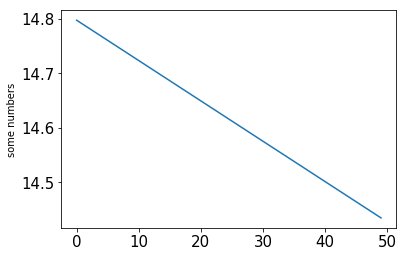

In [157]:
import calcSun
from datetime import datetime
import Here
import matplotlib.pyplot as plt
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()

#at the current time
#now = datetime.utcnow()
#calcSun.RiseSetUTC( jd, latitude, longitude )
#14.797424 121.057481
a  = calcSun.calcTerminator( date, (14.797424,14.434346), (121.057481,121.454549) )
a[0],a[1],a[2] 

plt.plot(a[0])
plt.ylabel('some numbers')
plt.show()


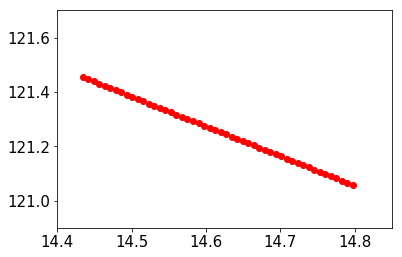

In [170]:
import calcSun
from datetime import datetime
import Here
import matplotlib.pyplot as plt
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()

#at the current time
#now = datetime.utcnow()
#calcSun.RiseSetUTC( jd, latitude, longitude )
#14.797424 121.057481
a  = calcSun.calcTerminator( date, (14.797424,14.434346), (121.057481,121.454549) )
a[0],a[1],a[2] 
plt.plot(a[0], a[1], 'ro')
plt.axis([14.4, 14.85, 120.9,121.7])
plt.show()

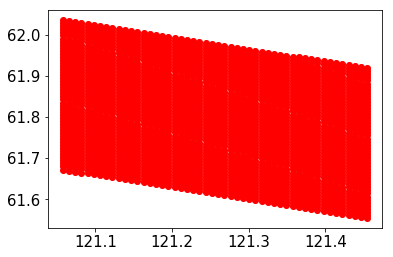

In [179]:
import calcSun
from datetime import datetime
import Here
import matplotlib.pyplot as plt
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()

#at the current time
#now = datetime.utcnow()
#calcSun.RiseSetUTC( jd, latitude, longitude )
#14.797424 121.057481
a  = calcSun.calcTerminator( date, (14.797424,14.434346), (121.057481,121.454549) )
a[0],a[1],a[2] 



# red dashes, blue squares and green triangles
#plt.axis([60.8, 62, -1,55])
plt.plot(a[1], a[2],  'ro' )
plt.show()

In [192]:
from datetime import datetime, timedelta
from pytz import timezone
import pytz
utc = pytz.utc
utc.zone

'UTC'

In [201]:
import calcSun
from datetime import datetime
import Here
import matplotlib.pyplot as plt
from astral import *
from datetime import datetime, timedelta
from pytz import timezone
import pytz
utc = pytz.utc
UTC = utc.zone
a = Astral()
location = a['Manila']
zone = location.timezone
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()
t = calcTimeJulianCent( jd )
localtime = datetime
calcAzEl( t, localtime, 14.797424, 121.057481, +0200 )



TypeError: unsupported operand type(s) for +: 'type' and 'float'

In [216]:
def calcAzEl( t, localtime, latitude, longitude, zone ):
    """
Calculate sun azimuth and zenith angle
    """
    eqTime = calcEquationOfTime(t)
    theta  = calcSunDeclination(t)

    solarTimeFix = eqTime + 4.0 * longitude - 60.0 * zone
    earthRadVec = calcSunRadVector(t)

    trueSolarTime = localtime + solarTimeFix
    while trueSolarTime > 1440:
        trueSolarTime -= 1440.

    hourAngle = trueSolarTime / 4.0 - 180.0
    if hourAngle < -180.: 
        hourAngle += 360.0

    haRad = numpy.radians(hourAngle)
    csz = numpy.sin(numpy.radians(latitude)) * numpy.sin(numpy.radians(theta)) + numpy.cos(numpy.radians(latitude)) * numpy.cos(numpy.radians(theta)) * numpy.cos(haRad)
    if csz > 1.0: 
        csz = 1.0 
    elif csz < -1.0: 
        csz = -1.0
    zenith = numpy.degrees(numpy.arccos(csz))
    azDenom = numpy.cos(numpy.radians(latitude)) * numpy.sin(numpy.radians(zenith))
    if abs(azDenom) > 0.001: 
        azRad = (( numpy.sin(numpy.radians(latitude)) * numpy.cos(numpy.radians(zenith)) ) - numpy.sin(numpy.radians(theta))) / azDenom
        if abs(azRad) > 1.0: 
            if azRad < 0.: 
                azRad = -1.0 
            else:
                azRad = 1.0
        
        azimuth = 180.0 - numpy.degrees(numpy.arccos(azRad))
        if hourAngle > 0.0: 
            azimuth = -azimuth
    else:
        if latitude > 0.0: 
            azimuth = 180.0 
        else:
            azimuth = 0.0
    if azimuth < 0.0: 
        azimuth += 360.0
    exoatmElevation = 90.0 - zenith

    # Atmospheric Refraction correction
    if exoatmElevation > 85.0: 
        refractionCorrection = 0.0
    else:
        te = numpy.tan(numpy.radians(exoatmElevation))
        if exoatmElevation > 5.0: 
            refractionCorrection = 58.1 / te - 0.07 / (te*te*te) + 0.000086 / (te*te*te*te*te) 
        elif exoatmElevation > -0.575: 
            refractionCorrection = 1735.0 + exoatmElevation * (-518.2 + exoatmElevation * (103.4 + exoatmElevation * (-12.79 + exoatmElevation * 0.711) ) ) 
        else:
            refractionCorrection = -20.774 / te
        refractionCorrection = refractionCorrection / 3600.0

    solarZen = zenith - refractionCorrection
    
    return azimuth, solarZen

import calcSun
from datetime import datetime
import Here
import matplotlib.pyplot as plt
from astral import *
from datetime import datetime, timedelta
from pytz import timezone
import pytz
utc = pytz.utc
UTC = utc.zone
a = Astral()
location = a['Manila']
zone = location.timezone
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()
t = calcTimeJulianCent( jd )
localtime = datetime.datetime
#calcAzEl( t, localtime, 14.797424, 121.057481, +0200 )
#eqTime = calcEquationOfTime(t)
#theta  = calcSunDeclination(t)
#solarTimeFix = eqTime + 4.0 - 60.0 * 3
#trueSolarTime = localtime + solarTimeFix
print localtime


AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [129]:
%%writefile calcSun.py
# UTILS/calcSun
"""
*********************
**Module**: utils.calcSun
*********************
This subpackage contains def to calculate sunrise/sunset

This includes the following defs:
    * :func:`utils.calcSun.getJD`: 
        calculate the julian date from a python datetime object
    * :func:`utils.calcSun.calcTimeJulianCent`: 
        convert Julian Day to centuries since J2000.0.
    * :func:`utils.calcSun.calcGeomMeanLongSun`: 
        calculate the Geometric Mean Longitude of the Sun (in degrees)
    * :func:`utils.calcSun.calcGeomMeanAnomalySun`: 
        calculate the Geometric Mean Anomaly of the Sun (in degrees)
    * :func:`utils.calcSun.calcEccentricityEarthOrbit`: 
        calculate the eccentricity of earth's orbit (unitless)
    * :func:`utils.calcSun.calcSunEqOfCenter`: 
        calculate the equation of center for the sun (in degrees)
    * :func:`utils.calcSun.calcSunTrueLong`: 
        calculate the true longitude of the sun (in degrees)
    * :func:`utils.calcSun.calcSunTrueAnomaly`: 
        calculate the true anamoly of the sun (in degrees)
    * :func:`utils.calcSun.calcSunRadVector`: 
        calculate the distance to the sun in AU (in degrees)
    * :func:`utils.calcSun.calcSunApparentLong`: 
        calculate the apparent longitude of the sun (in degrees)
    * :func:`utils.calcSun.calcMeanObliquityOfEcliptic`: 
        calculate the mean obliquity of the ecliptic (in degrees)
    * :func:`utils.calcSun.calcObliquityCorrection`: 
        calculate the corrected obliquity of the ecliptic (in degrees)
    * :func:`utils.calcSun.calcSunRtAscension`: 
        calculate the right ascension of the sun (in degrees)
    * :func:`utils.calcSun.calcSunDeclination`: 
        calculate the declination of the sun (in degrees)
    * :func:`utils.calcSun.calcEquationOfTime`: 
        calculate the difference between true solar time and mean solar time (output: equation of time in minutes of time)
    * :func:`utils.calcSun.calcHourAngleSunrise`: 
        calculate the hour angle of the sun at sunrise for the latitude (in radians)
    * :func:`utils.calcSun.calcAzEl`: 
        calculate sun azimuth and zenith angle
    * :func:`utils.calcSun.calcSolNoonUTC`: 
        calculate time of solar noon the given day at the given location on earth (in minutes since 0 UTC)
    * :func:`utils.calcSun.calcSolNoon`: 
        calculate time of solar noon the given day at the given location on earth (in minutes)
    * :func:`utils.calcSun.calcSunRiseSetUTC`: 
        calculate sunrise/sunset the given day at the given location on earth (in minutes since 0 UTC)
    * :func:`utils.calcSun.calcSunRiseSet`: 
        calculate sunrise/sunset the given day at the given location on earth (in minutes)
    * :func:`utils.calcSun.calcTerminator`: 
        calculate terminator position and solar zenith angle for a given julian date-time within latitude/longitude limits
        note that for plotting only, basemap has a built-in terminator

Source: http://www.esrl.noaa.gov/gmd/grad/solcalc/
Translated to Python by Sebastien de Larquier

*******************************
"""
import math
import numpy


def calcTimeJulianCent( jd ):
    """
Convert Julian Day to centuries since J2000.0.
    """
    T = (jd - 2451545.0)/36525.0
    return T



def calcGeomMeanLongSun( t ):
    """
Calculate the Geometric Mean Longitude of the Sun (in degrees)
    """
    L0 = 280.46646 + t * ( 36000.76983 + t*0.0003032 )
    while L0 > 360.0:
        L0 -= 360.0
    while L0 < 0.0:
        L0 += 360.0
    return L0 # in degrees



def calcGeomMeanAnomalySun( t ):
    """
Calculate the Geometric Mean Anomaly of the Sun (in degrees)
    """
    M = 357.52911 + t * ( 35999.05029 - 0.0001537 * t)
    return M # in degrees



def calcEccentricityEarthOrbit( t ):
    """
Calculate the eccentricity of earth's orbit (unitless)
    """
    e = 0.016708634 - t * ( 0.000042037 + 0.0000001267 * t)
    return e # unitless



def calcSunEqOfCenter( t ):
    """
Calculate the equation of center for the sun (in degrees)
    """
    mrad = numpy.radians(calcGeomMeanAnomalySun(t))
    sinm = numpy.sin(mrad)
    sin2m = numpy.sin(mrad+mrad)
    sin3m = numpy.sin(mrad+mrad+mrad)
    C = sinm * (1.914602 - t * (0.004817 + 0.000014 * t)) + sin2m * (0.019993 - 0.000101 * t) + sin3m * 0.000289
    return C # in degrees



def calcSunTrueLong( t ):
    """
Calculate the true longitude of the sun (in degrees)
    """
    l0 = calcGeomMeanLongSun(t)
    c = calcSunEqOfCenter(t)
    O = l0 + c
    return O # in degrees



def calcSunTrueAnomaly( t ):
    """
Calculate the true anamoly of the sun (in degrees)
    """
    m = calcGeomMeanAnomalySun(t)
    c = calcSunEqOfCenter(t)
    v = m + c
    return v # in degrees



def calcSunRadVector( t ):
    """
Calculate the distance to the sun in AU (in degrees)
    """
    v = calcSunTrueAnomaly(t)
    e = calcEccentricityEarthOrbit(t)
    R = (1.000001018 * (1. - e * e)) / ( 1. + e * numpy.cos( numpy.radians(v) ) )
    return R # n AUs



def calcSunApparentLong( t ):
    """
Calculate the apparent longitude of the sun (in degrees)
    """
    o = calcSunTrueLong(t)
    omega = 125.04 - 1934.136 * t
    SunLong = o - 0.00569 - 0.00478 * numpy.sin(numpy.radians(omega))
    return SunLong # in degrees



def calcMeanObliquityOfEcliptic( t ):
    """
Calculate the mean obliquity of the ecliptic (in degrees)
    """
    seconds = 21.448 - t*(46.8150 + t*(0.00059 - t*(0.001813)))
    e0 = 23.0 + (26.0 + (seconds/60.0))/60.0
    return e0 # in degrees



def calcObliquityCorrection( t ):
    """
Calculate the corrected obliquity of the ecliptic (in degrees)
    """
    e0 = calcMeanObliquityOfEcliptic(t)
    omega = 125.04 - 1934.136 * t
    e = e0 + 0.00256 * numpy.cos(numpy.radians(omega))
    return e # in degrees



def calcSunRtAscension( t ):
    """
Calculate the right ascension of the sun (in degrees)
    """
    e = calcObliquityCorrection(t)
    SunLong = calcSunApparentLong(t)
    tananum = ( numpy.cos(numpy.radians(e)) * numpy.sin(numpy.radians(SunLong)) )
    tanadenom = numpy.cos(numpy.radians(SunLong))
    alpha = numpy.degrees(anumpy.arctan2(tananum, tanadenom))
    return alpha # in degrees



def calcSunDeclination( t ):
    """
Calculate the declination of the sun (in degrees)
    """
    e = calcObliquityCorrection(t)
    SunLong = calcSunApparentLong(t)
    sint = numpy.sin(numpy.radians(e)) * numpy.sin(numpy.radians(SunLong))
    theta = numpy.degrees(numpy.arcsin(sint))
    return theta # in degrees



def calcEquationOfTime( t ):
    """
Calculate the difference between true solar time and mean solar time (output: equation of time in minutes of time)  
    """
    epsilon = calcObliquityCorrection(t)
    l0 = calcGeomMeanLongSun(t)
    e = calcEccentricityEarthOrbit(t)
    m = calcGeomMeanAnomalySun(t)
    y = numpy.tan(numpy.radians(epsilon/2.0))
    y *= y

    sin2l0 = numpy.sin(numpy.radians(2.0 * l0))
    sinm   = numpy.sin(numpy.radians(m))
    cos2l0 = numpy.cos(numpy.radians(2.0 * l0))
    sin4l0 = numpy.sin(numpy.radians(4.0 * l0))
    sin2m  = numpy.sin(numpy.radians(2.0 * m))

    Etime = y * sin2l0 - 2.0 * e * sinm + 4.0 * e * y * sinm * cos2l0 - 0.5 * y * y * sin4l0 - 1.25 * e * e * sin2m
    return numpy.degrees(Etime*4.0) # in minutes of time



def calcHourAngleSunrise( lat, solarDec ):
    """
Calculate the hour angle of the sun at sunrise for the latitude (in radians)
    """
    latRad = numpy.radians(lat)
    sdRad  = numpy.radians(solarDec)
    HAarg = numpy.cos(numpy.radians(90.833)) / ( numpy.cos(latRad)*numpy.cos(sdRad) ) - numpy.tan(latRad) * numpy.tan(sdRad)
    HA = numpy.arccos(HAarg);
    return HA # in radians (for sunset, use -HA)



def calcAzEl( t, localtime, latitude, longitude, zone ):
    """
Calculate sun azimuth and zenith angle
    """
    eqTime = calcEquationOfTime(t)
    theta  = calcSunDeclination(t)

    solarTimeFix = eqTime + 4.0 * longitude - 60.0 * zone
    earthRadVec = calcSunRadVector(t)

    trueSolarTime = localtime + solarTimeFix
    while trueSolarTime > 1440:
        trueSolarTime -= 1440.

    hourAngle = trueSolarTime / 4.0 - 180.0
    if hourAngle < -180.: 
        hourAngle += 360.0

    haRad = numpy.radians(hourAngle)
    csz = numpy.sin(numpy.radians(latitude)) * numpy.sin(numpy.radians(theta)) + numpy.cos(numpy.radians(latitude)) * numpy.cos(numpy.radians(theta)) * numpy.cos(haRad)
    if csz > 1.0: 
        csz = 1.0 
    elif csz < -1.0: 
        csz = -1.0
    zenith = numpy.degrees(numpy.arccos(csz))
    azDenom = numpy.cos(numpy.radians(latitude)) * numpy.sin(numpy.radians(zenith))
    if abs(azDenom) > 0.001: 
        azRad = (( numpy.sin(numpy.radians(latitude)) * numpy.cos(numpy.radians(zenith)) ) - numpy.sin(numpy.radians(theta))) / azDenom
        if abs(azRad) > 1.0: 
            if azRad < 0.: 
                azRad = -1.0 
            else:
                azRad = 1.0
        
        azimuth = 180.0 - numpy.degrees(numpy.arccos(azRad))
        if hourAngle > 0.0: 
            azimuth = -azimuth
    else:
        if latitude > 0.0: 
            azimuth = 180.0 
        else:
            azimuth = 0.0
    if azimuth < 0.0: 
        azimuth += 360.0
    exoatmElevation = 90.0 - zenith

    # Atmospheric Refraction correction
    if exoatmElevation > 85.0: 
        refractionCorrection = 0.0
    else:
        te = numpy.tan(numpy.radians(exoatmElevation))
        if exoatmElevation > 5.0: 
            refractionCorrection = 58.1 / te - 0.07 / (te*te*te) + 0.000086 / (te*te*te*te*te) 
        elif exoatmElevation > -0.575: 
            refractionCorrection = 1735.0 + exoatmElevation * (-518.2 + exoatmElevation * (103.4 + exoatmElevation * (-12.79 + exoatmElevation * 0.711) ) ) 
        else:
            refractionCorrection = -20.774 / te
        refractionCorrection = refractionCorrection / 3600.0

    solarZen = zenith - refractionCorrection
    
    return azimuth, solarZen



def calcSolNoonUTC( jd, longitude ):
    """
Calculate time of solar noon the given day at the given location on earth (in minute since 0 UTC)
    """
    tnoon = calcTimeJulianCent(jd)
    eqTime = calcEquationOfTime(tnoon)
    solNoonUTC = 720.0 - (longitude * 4.) - eqTime # in minutes
    return solNoonUTC



def calcSolNoon( jd, longitude, timezone, dst ):
    """
Calculate time of solar noon the given day at the given location on earth (in minute)
    """
    timeUTC    = calcSolNoonUTC(jd, longitude)
    newTimeUTC = calcSolNoonUTC(jd + timeUTC/1440.0, longitude)
    solNoonLocal = newTimeUTC + (timezone*60.0) # in minutes
    if dst: 
        solNoonLocal += 60.0
    return solNoonLocal



def calcSunRiseSetUTC( jd, latitude, longitude ):
    """
Calculate sunrise/sunset the given day at the given location on earth (in minute since 0 UTC)
    """
    t = calcTimeJulianCent(jd)
    eqTime = calcEquationOfTime(t)
    solarDec = calcSunDeclination(t)
    hourAngle = calcHourAngleSunrise(latitude, solarDec)
    # Rise time
    delta = longitude + numpy.degrees(hourAngle)
    riseTimeUTC = 720. - (4.0 * delta) - eqTime # in minutes
    # Set time
    hourAngle = -hourAngle
    delta = longitude + numpy.degrees(hourAngle)
    setTimeUTC = 720. - (4.0 * delta) - eqTime # in minutes
    return riseTimeUTC, setTimeUTC



def calcSunRiseSet( jd, latitude, longitude, timezone, dst ):
    """
Calculate sunrise/sunset the given day at the given location on earth (in minutes)
    """
    rtimeUTC, stimeUTC = calcSunRiseSetUTC(jd, latitude, longitude)
    # calculate local sunrise time (in minutes)
    rnewTimeUTC, snewTimeUTC = calcSunRiseSetUTC(jd + rtimeUTC/1440.0, latitude, longitude)
    rtimeLocal = rnewTimeUTC + (timezone * 60.0)
    rtimeLocal += 60.0 if dst else 0.0
    if rtimeLocal < 0.0 or rtimeLocal >= 1440.0: 
        jday = jd
        increment = 1. if rtimeLocal < 0. else -1.
        while rtimeLocal < 0.0 or rtimeLocal >= 1440.0:
            rtimeLocal += increment * 1440.0
            jday -= increment
    # calculate local sunset time (in minutes)
    rnewTimeUTC, snewTimeUTC = calcSunRiseSetUTC(jd + stimeUTC/1440.0, latitude, longitude)
    stimeLocal = snewTimeUTC + (timezone * 60.0)
    stimeLocal += 60.0 if dst else 0.0
    if stimeLocal < 0.0 or stimeLocal >= 1440.0: 
        jday = jd
        increment = 1. if stimeLocal < 0. else -1.
        while stimeLocal < 0.0 or stimeLocal >= 1440.0:
            stimeLocal += increment * 1440.0
            jday -= increment
    # return
    return rtimeLocal, stimeLocal



def calcTerminator( date, latitudes, longitudes ):
    """
Calculate terminator position and solar zenith angle for a given julian date-time within 
latitude/longitude limits
Note that for plotting only, basemap has a built-in terminator
    """
    jd = getJD(date)
    t = calcTimeJulianCent(jd)
    ut = ( jd - (int(jd - 0.5) + 0.5) )*1440.
    npoints = 50
    zen = numpy.zeros((npoints,npoints))
    lats = numpy.linspace(latitudes[0], latitudes[1], num=npoints)
    lons = numpy.linspace(longitudes[0], longitudes[1], num=npoints)
    term = []
    for ilat in range(1,npoints+1):
        for ilon in range(npoints):
            az,el = calcAzEl(t, ut, lats[-ilat], lons[ilon], 0.) 
            zen[-ilat,ilon] = el
        a = (90 - zen[-ilat,:])
        mins = numpy.r_[False, a[1:]*a[:-1] <= 0] | \
            numpy.r_[a[1:]*a[:-1] <= 0, False] 
        zmin = mins & numpy.r_[False, a[1:] < a[:-1]]
        if True in zmin:
            ll = numpy.interp(0, a[zmin][-1::-1], lons[zmin][-1::-1])
            term.append([lats[-ilat], ll])
        zmin = mins & numpy.r_[a[:-1] < a[1:], False]
        if True in zmin:
            ll = numpy.interp(0, a[zmin], lons[zmin])
            term.insert(0, [lats[-ilat], ll])
    return lats, lons, zen, numpy.array(term)



def getJD( date ):
    """
Calculate julian date for given day, month and year
    """
    from dateutil.relativedelta import relativedelta
    
    if date.month < 2: 
        date.replace(year=date.year-1)
        date += relativedelta(month=12)

    A = numpy.floor(date.year/100.)
    B = 2. - A + numpy.floor(A/4.)
    jd = numpy.floor(365.25*(date.year + 4716.)) + numpy.floor(30.6001*(date.month+1)) + date.day + B - 1524.5
    jd = jd + date.hour/24.0 + date.minute/1440.0 + date.second/86400.0
    return jd



Writing calcSun.py


In [140]:
import calcSun
from datetime import datetime
import Here
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()
print latitude, longitude

14.797424 121.057481


In [ ]:
from datetime import date
nd = datetime.date(1917, 10, 16)
nt = datetime.time(19, 10, 16)
print nd, nt



from astral import *
a = Astral()
location = a['London']
timezone = location.timezone
from datetime import date
d = date(2009,4,22)
sun = location.sun(local=True, date=d)
s= str(sun['dawn'])

print s




In [138]:
import calcSun
from datetime import datetime
import Here
date = datetime.utcnow()
jd = calcSun.getJD( date )
latitude, longitude = Here.here()
#at the current time
now = datetime.utcnow()
calcSun.calcSunRiseSetUTC( jd, latitude, longitude )

TypeError: ufunc 'radians' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import calcSun
from datetime import datetime

#evaluate on a 2 degree grid
lon  = linspace(-180,180,181)
lat = linspace(-90,90,91)
LON, LAT = meshgrid(lon,lat)
#at the current time
now = datetime.utcnow()

In [187]:
from astral import *
a = Astral()
location = a['Manila']
timezone = location.timezone
from datetime import date
d = date(2009,4,22)
sun = location.sun(local=True, date=d)
s= str(sun['dawn'])

print s

2009-04-22 05:15:56+08:00


In [188]:
from astral import *
a = Astral()
location = a['Manila']
timezone = location.timezone
print timezone

Asia/Manila


In [200]:
from datetime import datetime
from pytz import timezone

fmt = "%Y-%m-%d %H:%M:%S %Z%z"
timezonelist = ['UTC','US/Pacific','Europe/Berlin']
for zone in timezonelist:

    now_time = datetime.now(timezone(zone))
    print now_time.strftime(fmt)

2017-10-16 08:10:30 UTC+0000
2017-10-16 01:10:30 PDT-0700
2017-10-16 10:10:30 CEST+0200


In [4]:
import TLE

SyntaxError: Non-ASCII character '\xe2' in file TLE.py on line 49, but no encoding declared; see http://python.org/dev/peps/pep-0263/ for details (TLE.py, line 48)

at trise, JD =  2458053.72997
at (0N, 0E) Sun's altitude:  -3.38745806393 azimuth:  102.869069247
at (0N, 0E) Sun's distance (km):  148673688.277
limits  0 180.0  converged! Found longitude (deg):  3.47453704827
limits  180 360.0  converged! Found longitude (deg):  183.469494819


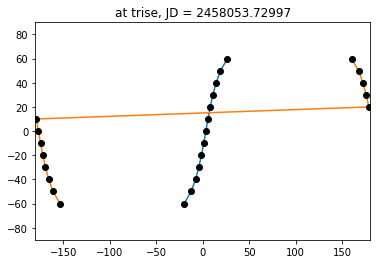

In [6]:
def alt_lonlat(lon, lat, t):
    topo = earth + Topos(lat, lon)
    alt, az, dist = topo.at(trise).observe(sun).apparent().altaz() ## apparent() args for atmospheric refraction
    return alt.degrees

from skyfield.api import load, Topos
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

data  = load('de421.bsp')
ts    = load.timescale()
# your example:  '2017-10-17', sunset = '10:00 PM', sunrise = '7:30 AM'
trise  = ts.utc(2017, 10, 27,  5, 30, 0)
tset   = ts.utc(2017, 10, 27, 6,  0, 0)

earth = data['earth']
sun   = data['sun']

zerozero = earth + Topos(0.0, 0.0)   # gotta start looking somewhere!
alt, az, dist = zerozero.at(trise).observe(sun).apparent().altaz() ## apparent() args for atmospheric refraction

print "at trise, JD = ", trise.tt
print "at (0N, 0E) Sun's altitude: ", alt.degrees, "azimuth: ", az.degrees
print "at (0N, 0E) Sun's distance (km): ", dist.km

# Find points on equator where sun is on horizon (rise or set) at t=trise
limits   = ((0, 180.), (180, 360.))
lonzeros = []
for a, b in limits:

    answer, info = spo.brentq(alt_lonlat, a, b,
                              args=(0.0, trise),
                              full_output = True )
    if info.converged:
        lonzeros.append(answer)
        print "limits ", a, b, " converged! Found longitude (deg): ", answer
    else:
        print "limits ", a, b, "whaaaa?"
        lonzeros.append(None)

# make some curves
lats = np.linspace(-60, 60, 13)
longis = []
for lon0 in lonzeros:
    lons = []
    for lat in lats:
        answer, info = spo.brentq(alt_lonlat, lon0-90, lon0+90,
                                  args=(lat, trise),
                                  full_output = True )
        if info.converged:
            lons.append(answer)
        else:
            lons.append(None)

        lons = [(lon+180)%360.-180 for lon in lons]  # wraparound at +/- 180
    longis.append(lons)
plt.figure()

for lons in longis:
    plt.plot(lons, lats)

for lons in longis:
    plt.plot(lons, lats, 'ok')

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.title("at trise, JD = " + str(trise.tt))

plt.show()